# Bank marketing campaigns dataset analysis # Opening a Term Deposit

# Business problem understanding


**Context**\
Sebuah institusi yang bergerak di bidang perbankan di negara Portugal ingin menggaet customer untuk berlangganan produk deposit berjangka di bank mereka. Maka dari itu, pihak bank akan melakukan kampanye dengan metode *Telemarketing*, yaitu kampanye secara langsung kepada nasabah melalui panggilan telepon. Pihak bank ingin mengetahui calon nasabah mana yang benar-benar ingin berlangganan produk deposit berjangka sebelum pihak bank melakukan panggilan telepon. Hal ini bertujuan untuk mengurangi biaya, waktu, serta usaha lainnya dalam mempersiapkan kampanye, serta kategorisasi calon nasabah. Informasi terkait data pribadi, panggilan telepon, kondisi sosial-ekonomi ada di dalam database bank.

Divisi Data Science bertanggung jawab untuk mengidentifikasi peluang yang dihasilkan dari data yang tersedia. Dalam kasus ini, kita sebagai anggota tim Data Scientist ditugaskan untuk dapat memprediksi calon nasabah potensial mana saja yang dapat menjadi pelanggan produk deposit berjangka. Tim Data Scientist diminta untuk membuat model Machine Learning yang akan digunakan oleh Tim Marketing dan Customer Service dari bank bersangkutan.
(https://id.joblum.com/job/data-scientist/67704)

Target:\
0: Nasabah tidak berlangganan produk deposit berjangka\
1: Nasabah berlangganan produk deposit berjangka

**Problem Statement**

Kampanye melalui panggilan telepon akan memakan waktu dan sumber daya jika pihak bank melakukan panggilan telepon kepada calon nasabah tanpa melakukan seleksi terlebih dahulu. Pihak bank ingin meningkatkan efisiensi dalam menggaet nasabah dengan mengetahui calon nasabah mana yang akan berlangganan produk melalui analisis data nasabah terdahulu.

**Goals:**

Berdasarkan permasalahan tersebut, pihak bank ingin memiliki kemampuan untuk melakukan prediksi kemungkinan calon nasabah untuk berlangganan produk deposit berjangka melalui pendekatan panggilan telepon, sehingga pihak bank dapat memfokuskan panggilan telepon kepada calon nasabah yang ingin berlangganan produk deposit berjangka. Maka dari itu, kita akan melakukan prediksi menggunakan machine learning dengan metode Supervise Learning (Classification).

Bank juga ingin mengetahui faktor/variabel yang mempengaruhi seorang calon nasabah untuk mau berlangganan produk deposit berjangka atau tidak, sehingga pihak bank dapat membuat strategi yang baik dalam menggaet calon nasabah melalui panggilan telepon.

**Analytic Approach:**

Kita akan melakukan analisis data untuk menemukan pola yang membedakan calon nasabah yang akan berlangganan produk deposit berjangka dan tidak akan berlangganan.

Kemudian kita akan membangun model klasifikasi yang akan membantu pihak bank untuk dapat memprediksi probabilitas seorang calon nasabah akan/ingin berlangganan produk deposit berjangka atau tidak.

**Metric Evaluation**
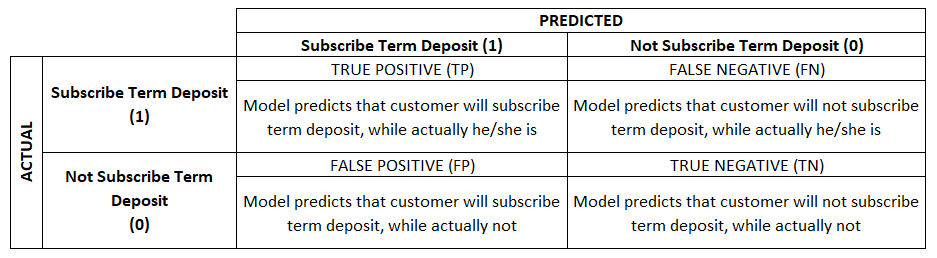

Type 1 error : False Positive\
Konsekuensi: Penambahan biaya *Telemarketing*, waktu dan sumber daya

Type 2 error : False Negative\
Konsekuensi: Kehilangan potential income dari deposito

**Metric Analysis** 

Biaya telemarketing per 100 orang nasabah:
* Biaya telepon  0.45EUR (http://www.onesimcard.com/cell-phone-rates/portugal/#rates_table)
* Rata-rata durasi telepon 258 detik, dibulatkan menjadi 5 menit
* Rata-rata pengulangan telepon calon nasabah adalah 2 kali
* **Total biaya telepon untuk seluruh nasabah** : 100 x 0.45EURx 5 x 2 = **450EUR**

Income Bank dari deposit berjangka per 100 orang nasabah:
* Angka deposit minimal adalah 250EUR(setara 3,750,000 IDR) per pelanggan (https://www.bbva.pt/en/pessoas/produtos/depositos-a-prazo.html)
* Asumsi 1x melakukan deposit sebesar 3400EUR (setara 51,000,000IDR)
* Asumsi bank mendapatkan keuntungan 2% dari transaksi deposito
* 11% nasabah berlayanan deposito
* **Total keuntungan yang didapatkan** : (100 x 11%) x 3400EUR x 2% = **748EUR** 

Berdasarkan analisa di atas, potential income deposit berjangka dari 11% total calon nasabah sudah mampu menutupi semua total biaya telemarketing. Dengan memaksimalkan nasabah yang mau berlangganan deposito, bank dapat memaksimalkan potensi keuntungan yang didapat. Selain itu, semakin panjang tenor deposito yang diambil, maka semakin maksimal juga keuntungan yang bank dapatkan karena uang deposito akan digunakan untuk diputar untuk peminjaman (loan) kepada nasabah.

Di sisi lain kita juga ingin mengoptimasi tim Customer Service untuk melakukan melakukan panggilan telepon ke orang yang mau berdeposit, sehingga dapat mengurangi usaha dalam aspek biaya, waktu, dan tenaga.

Mengacu pada evaluation metric, kita perlu meminimalisir bagian False Negative yaitu kehilangan potential income dari deposito karena biaya yang dikeluarkan tidak sebanding dengan apa yang akan didapatkan dari deposit berjangka. Model yang diinginkan adalah model yang mampu mengurangi biaya telemarketing dengan meminimalisir berkurangnya potential income dari deposito serta mengoptimasi tim Customer Service untuk melakukan telemarketing kepada nasabah yang tepat. Metric yang akan kita gunakan adalah metric f score (f1 dan fbeta score) dan average precission karena kita tertarik di 1 kelas (Positive).

# Data Understanding

Dataset source : https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset 

Dataset ini mendeskripsikan hasil marketing campaign Bank Portugal.\
Marketing campaign dilakukan dengan basis panggilan telepon, menawarkan nasabah untuk menempatkan dana di deposit berjangka.\
Note :

* Dataset terdiri dari 41188 data dengan 20 input variabel dan 1 output variabel
* Dataset diurutkan berdasarkan waktu (May 2008 - November 2010)
* Dataset tidak seimbang
* Fitur terdiri dari data bersifat kategori dan numerik,  beberapa dengan kardinalitas tinggi
* Setiap baris data merepresentasikan informasi seorang calon nasabah yang ditawarkan produk deposit berjangka melalui pendekatan telepon di masa lalu
* Missing Attribute Values diidentifikasikan ke dengan  label 'unknown'

**Additional Information :**\
Dalam rentang waktu didalam dataset, terjadi beberapa peristiwa nasional maupun global. Salah satunya adalah peristiwa The Great Recession, yaitu periode penurunan umum ekonomi (resesi) yang terjadi dalam ekonomi global diantara tahun 2007 sampai 2009. Pada waktu itu, International Monetary Fund (IMF) menyatakan bahwa ini adalah kondisi ekonomi dan finansial paling parah setelah peristiwa The Great Depression (1930). 

Krisis di Eropa umumnya berkembang dari krisis sistem perbankan ke krisis utang negara, karena banyak negara memilih untuk menyelamatkan sistem perbankan mereka menggunakan uang pembayar pajak. Beberapa negara menerima paket bailout dari troika (European Commission, European Central Bank, International Monetary Fund), yang juga menerapkan serangkaian tindakan darurat.

Eurostat melaporkan bahwa rasio utang terhadap PDB untuk 17 negara kawasan Euro bersama-sama adalah 70,1% pada tahun 2008, 79,9% pada tahun 2009, 85,3% pada tahun 2010, dan 87,2% pada tahun 2011

Selengkapnya dapat dibaca pada artikel berikut:
* [The Great Recession and its effect on Europe](https://en.wikipedia.org/wiki/Great_Recession#Effects_on_Europe). 
* [The Great Recession in Portugal](https://en.wikipedia.org/wiki/Great_Recession_in_Europe#Portugal). 



**Attribute Information :**

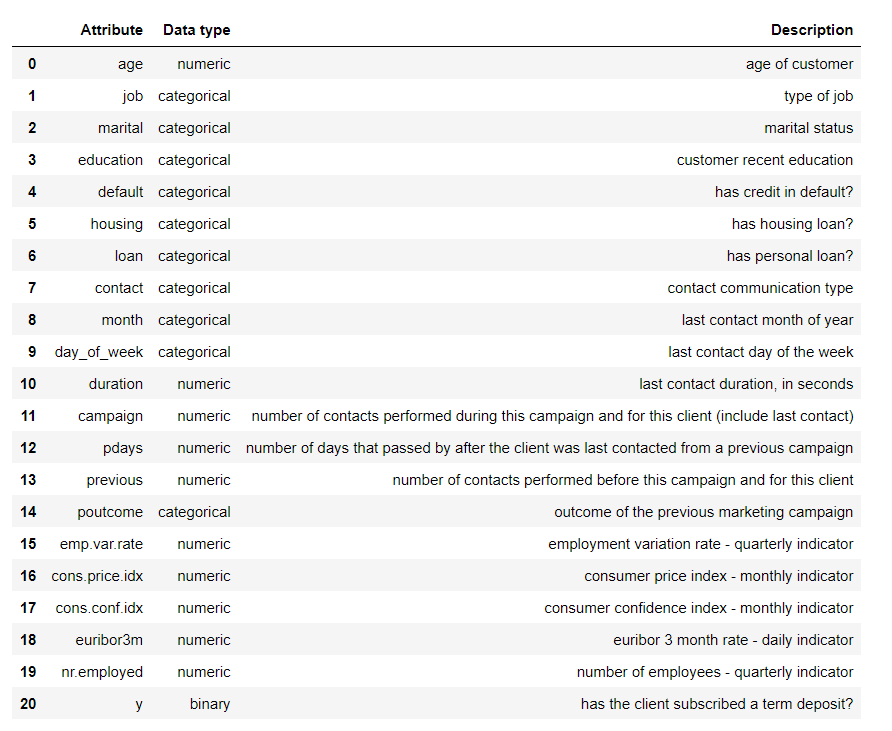

In [1]:
# Library
import pandas as pd
import numpy as np

# Normality Distribution
from scipy.stats import shapiro

# Statistic Test
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

# Visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, average_precision_score
from sklearn.metrics import SCORERS, make_scorer, fbeta_score
from sklearn.metrics import confusion_matrix

# Imbalance Dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline 

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    


# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Explanatory Data Analysis

In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Dari deskripsi data, didapatkan informasi bahwa dataset memiliki 10 fitur kuantitatif atau tipe data numerik dengan nilai central of tendencies (mean,  median, modus) serta sebaran data (Q1,Q2,Q3,std) yang bervariasi. Kita mendapatkan informasi juga bahwa kemungkinan ditemukan outlier didalam distribusi data yang terlihat dari nilai std yang sangat besar karena mendekati nilai mean/median atau jarak data antara data max dan min yang sangat jauh. 

Maka dari itu, kita akan mengecek distribusi data dari setiap fitur untuk memastikan perlakuan apa yang akan kita lakukan kepada dataset.

In [4]:
# cek distribusi data
kolom=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
distribusi=[]
for i in kolom:
    stats, pval=shapiro(df[i])
    if pval>0.05:
        distribusi.append('normal')
    else:
        distribusi.append('tidak normal')
        
pd.DataFrame({'distribusi':distribusi},index=kolom)

,distribusi
age,tidak normal
duration,tidak normal
campaign,tidak normal
pdays,tidak normal
previous,tidak normal
emp.var.rate,tidak normal
cons.price.idx,tidak normal
cons.conf.idx,tidak normal
euribor3m,tidak normal
nr.employed,tidak normal


Data kuantitatif memiliki distribusi data tidak normal, sehingga kita akan menggunakan ukuran data median dalam perhitungan data. Selanjutnya kita akan mengecek nilai outlier dari masing-masing fitur data kuantitatif.

In [5]:
#cek outlier
kolom=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
kolom_out=[]
for i in kolom:
    q1=df[i].describe()['25%']
    q3=df[i].describe()['75%']
    iqr=q3-q1
    out1=q3+1.5*iqr
    out2=q1-1.5*iqr
    index_out=(df.loc[(df[i]>out1)|(df[i]<out2)]).index
    n_out=df.loc[index_out][i].count()
    kolom_out.append(f'{n_out}')
    
pd.DataFrame({'jumlah outlier':kolom_out},index=kolom)

,jumlah outlier
age,469
duration,2963
campaign,2406
pdays,1515
previous,5625
emp.var.rate,0
cons.price.idx,0
cons.conf.idx,447
euribor3m,0
nr.employed,0


Dari analisis jumlah outlier, diperoleh beberapa fitur memiliki outlier dalam jumlah banyak. Maka dari itu dibutuhkan feature engineering atau metode lainnya untuk mengatasi hal tersebut.

<AxesSubplot:>

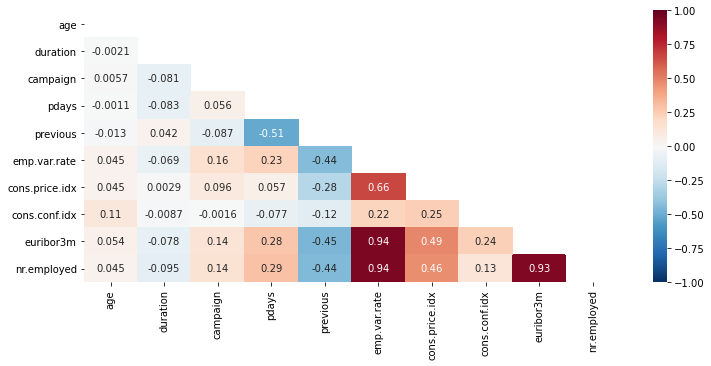

In [6]:
mask=np.triu(np.ones_like(df.corr(method = 'spearman'), dtype=np.bool_))

plt.figure(figsize=(12,5))
sns.heatmap(df.corr(method = 'spearman'), mask=mask, cmap='RdBu_r',annot=True, vmin=-1, vmax=1)

Berdasarkan hasil korelasi antar fitur, diperoleh informasi sebagai berikut:
* Korelasi kuat (0,7 - 1) : 
    * euribor3m dan emp.var.rate (0,94)
    * nr.employed dan emp.var.rate (0,94)
    * nr.employed dan euribor3m (0,93)
* Korelasi sedang (0,3 - 0,69) : 
    * cons.price.idx dan emp.var.rate (0,66)
    * euribor3m dan cons.price.idx (0,49)
    * nr.employed dan cons.price.idx (0,46)
    * previous dan pdays (-0,51)
    * euribor3m dan previous (-0.45)
    * emp.var.rate dan previous (-0.44)
    * nr.employed dan previous (-0.44) 
    
Dimana nilai positif artinya berbanding lurus (apabila nilai fitur A naik, maka nilai fitur B juga cenderung naik) dan negatif artinya berbanding terbalik (apabila fitur nilai fitur A naik, maka nilai fitur B cenderung turun)

In [7]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Dari deskripsi data, kita dapatkan dataset memiliki 11 kolom kualitatif atau tipe data objective dengan 10 fitur dan 1 target (``y``)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dari informasi data, tidak ditemukan missing value pada dataset. Hal ini dikarenakan nilai missing value (NaN) terdeteksi sebagai value 'unknown'. Semua tipe data telah cocok dengan tiap fitur dan target yang ada. 

Selanjutnya kita akan melakukan data cleaning untuk merapikan data dan membuat data siap dipakai untuk Machine Learning

## Data Cleaning

Kita akan melakukan pengecekan apakah ada nilai duplikat didalam dataframe

In [9]:
df_dup=df[df.duplicated(keep='last')]
df_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [10]:
df_dup.shape

(12, 21)

Ditemukan terdapat 12 data yang memiliki duplikat dengan data di indeks lain dalam dataframe. Hal ini dapat diakibatkan kesalahan saat proses ETL. Selanjutnya kita akan drop data duplikat

In [11]:
df=df.drop_duplicates()
df.shape

(41176, 21)

Kita akan ubah data dengan value 'unknown' menjadi NaN, agar data pada missing value dapat diisi sesuai dengan kondisi yang dibutuhkan. Selanjutkan kita akan melakukan analisa terhadap mising value dari setiap kolom

In [12]:
df=df.replace('unknown',np.nan)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [13]:
df.isna().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

<AxesSubplot:>

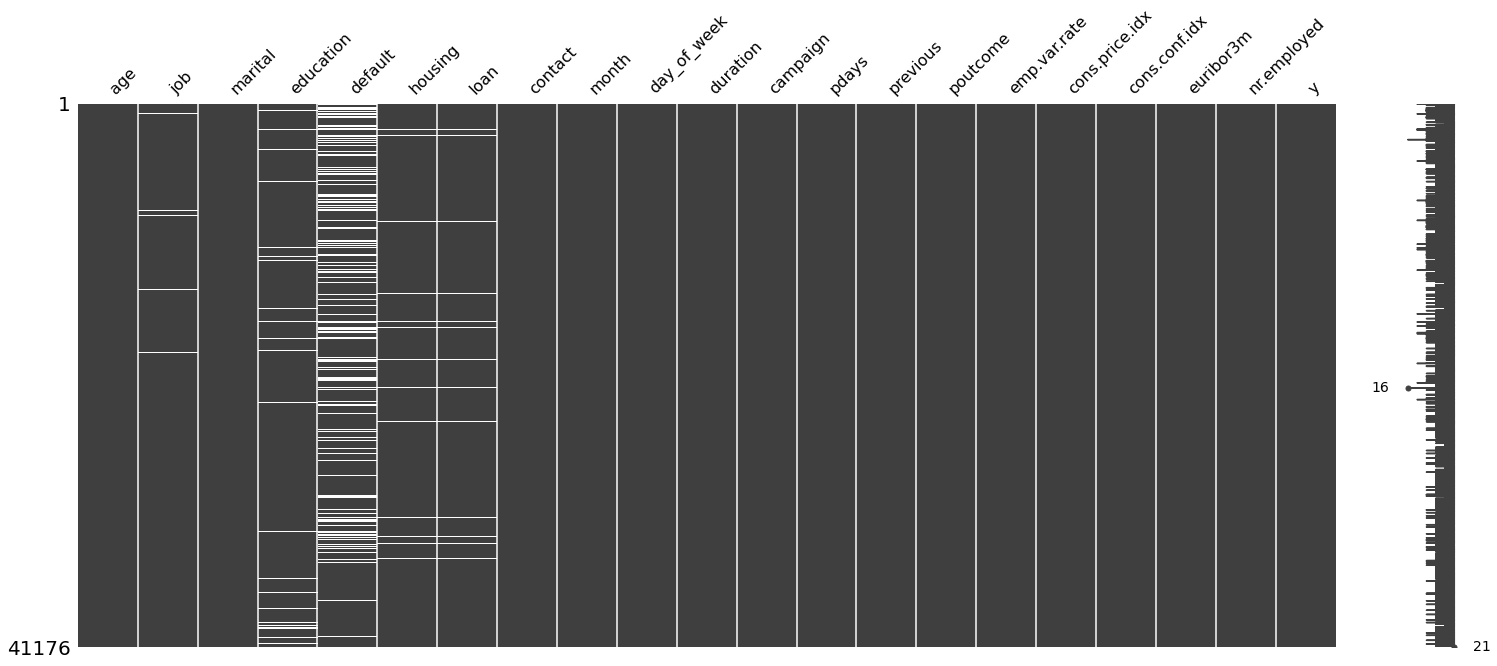

In [14]:
msno.matrix(df)

Dari matrix terlihat bahwa housing dan loan memiliki pola missing value yang sama, sedangkan fitur yang lain memiliki pola acak

**HEATMAP**

Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

-1 - Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.\
0 - Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.\
1 - Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada


<AxesSubplot:>

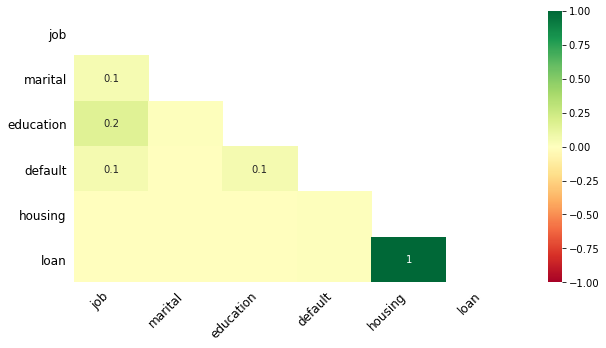

In [15]:
msno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

Terlihat dari Heatmap bahwa rata-rata missing values/data yang hilang antara 1 fitur dengan fitur yang lainnya tidak berhubungan/berkorelasi, tetapi untuk fitur housing dengan loan memiliki hubungan/korelasi yang sangat kuat dengan nilai 1 yang berartikan bahwa bila fitur housing itu ada datanya, maka fitur loan juga ada datanya dan begitu pula sebaliknya.

Berdasarkan korelasi nulitas antara default dengan housing dan loan, terlihat tidak ada korelasi sama sekali antar fitur. Namun, secara domain knowledge fitur ``default`` (kredit macet) akan dipengaruhi oleh jenis kredit (``housing`` dan ``loan``, dsb.) serta seberapa banyak nilai kredit yang mereka ambil. Maka dari itu kita akan coba cek hubungan data antar kolom

In [16]:
df['default'].value_counts()

no     32577
yes        3
Name: default, dtype: int64

Mayoritas nasabah tidak memiliki kredit macet. Kita akan abaikan nilai 3 di proses kemudian karena sangat tidak signifikan terhadap target.

In [17]:
df.groupby(['housing','loan']).count()[['default']]

default
housing loan         
no      no      12602
        yes      2008
yes     no      14239
        yes      2968

Dari data di atas, sebaran kredit yang tidak macet dengan jumlah terbanyak justru terdapat pada data ``housing``=Yes dan ``loan``=No. Dapat disimpulkan bahwa fitur ``default`` atau kredit macet tidak dipengaruhi oleh ``housing`` dan ``loan``.

Kita akan mengisi missing value pada fitur ``housing``, ``loan``, ``job``, ``marital`` menggunakan modus dari masing-masing kolom. Kita melakukan hal tersebut karena proporsi nilai missing value pada masing-masing kolom tidak terlalu signifikan terhadap jumlah data keseluruhan.

Missing value pada fitur ``default`` akan kita isi dengan konstanta 'Not Available' karena jumlah data yang hilang cukup banyak dan signifikan, apabila diisi dengan nilai berdasarkan nilai lain akan merusak komposisi data dan data menjadi bias.

In [18]:
# Mengisi missing value pada housing, loan, job, marital
df['housing']=df['housing'].fillna(df['housing'].mode()[0])
df['loan']=df['loan'].fillna(df['loan'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])
df['marital']=df['marital'].fillna(df['marital'].mode()[0])

# Mengisi missing value pada default
df['default']=df['default'].fillna('Not Available')

Kita akan mengisi missing value pada fitur ``education`` dengan menggunakan hubungan antara fitur ``job`` dengan ``education``. Kita akan melihat sebuah ``job`` mayoritas memiliki latar belakang pendidikan darimana. Berikut kita lakukan analisanya

In [19]:
# Persentase tiap job berdasarkan pendidikannya (pembagi menggunakan semua nilai yang ada)
pd.crosstab(df['education'],df['job'],normalize=True)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
education,,,,,,,,,,,
basic.4y,0.003270,0.058764,0.003473,0.012016,0.002535,0.015135,0.002358,0.003346,0.000659,0.001470,0.002839
basic.6y,0.004386,0.036125,0.001800,0.001952,0.002155,0.001901,0.000634,0.005729,0.000330,0.002206,0.000862
basic.9y,0.013436,0.091847,0.005324,0.002383,0.004208,0.003676,0.005577,0.009836,0.002510,0.009735,0.004715
high.school,0.085332,0.022258,0.005932,0.004411,0.007555,0.006997,0.002991,0.067941,0.009050,0.022106,0.006566
illiterate,0.000025,0.000203,0.000051,0.000025,0.000000,0.000076,0.000076,0.000000,0.000000,0.000000,0.000000
professional.course,0.009507,0.011484,0.003422,0.001496,0.002256,0.006110,0.004259,0.005527,0.001090,0.084090,0.003600
university.degree,0.146910,0.002383,0.015464,0.003524,0.052299,0.007200,0.019394,0.004386,0.004310,0.045860,0.006642


Dari data tersebut terlihat hubungan antara education dan job sebagai berikut:
* admin didominasi latar belakang pendidikan dari university.degree, high.school
* blue-collar didominasi latar belakang pendidikan dari basic.9y, basic.4y
* enterpreneur didominasi latar belakang pendidikan dari university.degree, basic.9y
* housemaid didominasi latar belakang pendidikan dari basic.4y, high.school
* management didominasi latar belakang pendidikan dari university.degree, high.school 
* retired didominasi latar belakang pendidikan dari basic.4y, university.degree
* self-employed didominasi latar belakang pendidikan dari university.degree, basic.9y
* services didominasi latar belakang pendidikan dari high.school, basic.9y	
* student didominasi latar belakang pendidikan dari high.school, university.degree	
* technician didominasi latar belakang pendidikan dari professional.course, high.school
* unemployed didominasi latar belakang pendidikan dari university.degree, high.school	

In [20]:
# membuat indeks missing value untuk setiap kolom education berdasarkan jenis job
NaN_admin_index=df.loc[(df['education'].isna())&(df['job']=='admin.')][['education','job']].index
NaN_bluecollar_index=df.loc[(df['education'].isna())&(df['job']=='blue-collar')][['education','job']].index
NaN_entrepreneur_index=df.loc[(df['education'].isna())&(df['job']=='entrepreneur')][['education','job']].index
NaN_technician_index=df.loc[(df['education'].isna())&(df['job']=='technician')][['education','job']].index
NaN_services_index=df.loc[(df['education'].isna())&(df['job']=='services')][['education','job']].index
NaN_management_index=df.loc[(df['education'].isna())&(df['job']=='management')][['education','job']].index
NaN_retired_index=df.loc[(df['education'].isna())&(df['job']=='retired')][['education','job']].index
NaN_selfemployed_index=df.loc[(df['education'].isna())&(df['job']=='self-employed')][['education','job']].index
NaN_housemaid_index=df.loc[(df['education'].isna())&(df['job']=='housemaid')][['education','job']].index
NaN_unemployed_index=df.loc[(df['education'].isna())&(df['job']=='unemployed')][['education','job']].index
NaN_student_index=df.loc[(df['education'].isna())&(df['job']=='student')][['education','job']].index

# mengisi missing value berdasarkan mayoritas pekerjaan sesuai background education
df['education'][NaN_admin_index]='university.degree'
df['education'][NaN_bluecollar_index]='basic.9y'
df['education'][NaN_entrepreneur_index]='university.degree'
df['education'][NaN_technician_index]='professional.course'
df['education'][NaN_services_index]='high.school'
df['education'][NaN_management_index]='university.degree'
df['education'][NaN_retired_index]='basic.4y'
df['education'][NaN_selfemployed_index]='university.degree'
df['education'][NaN_housemaid_index]='university.degree'
df['education'][NaN_unemployed_index]='university.degree'
df['education'][NaN_student_index]='high.school'

df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## EDA Summary

Untuk mendapatkan data yang siap pakai, langkah-langkah yang sudah dilakukan adalah:\
**1.** Cek deskripsi data objeketif (11 kolom) dan numerik (10 kolom)\
**2.** Cek distribusi data dan jumlah outlier dari setiap fitur numerik\
**3.** Cek korelasi antar fitur numerik\
**4.** Cek informasi data (tipe data dan missing value)\
**5.** Cek dan hapus data yang memiliki duplikat\
**6.** Ubah value 'unknown' untuk missing value dengan NaN\
**7.** Cek jumlah missing value NaN\
**8.** Isi missing value pada fitur:
* ``job``,``marital``,``housing``,``loan`` dengan modus dari tiap fitur (karena jumlah missing value sedikit\
* ``default`` dengan kategori 'unknown' karena memiliki jumlah missing value yang lebih banyak\
* ``education`` dengan latar belakang pendidikan terbanyak pada setiap nilai unik  di fitur ``job``

Data siap dipakai untuk dilakukan analasis.


# Data Analysis

Kita akan melakukan analisa dari setiap fitur terhadap target. Kita melakukan analisa berdasarkan pengelompokan data sebagai berikut:
* bank client data : age, job, marital, education, default, housing, loan 
* related with the last contact of the current campaign : contact, month, day_of_week, duration
* other attributes : campaign, pdays, previous, poutcome
* social and economic context attributes : emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
* output variable (desired target) : y

## Bank client data analysis

### Fitur ``age``

<AxesSubplot:xlabel='y', ylabel='age'>

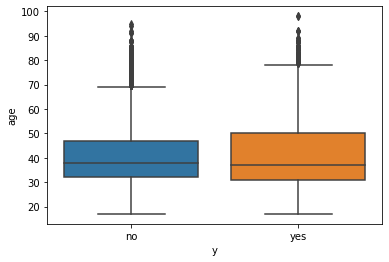

In [21]:
sns.boxplot(x='y', y='age', data=df)

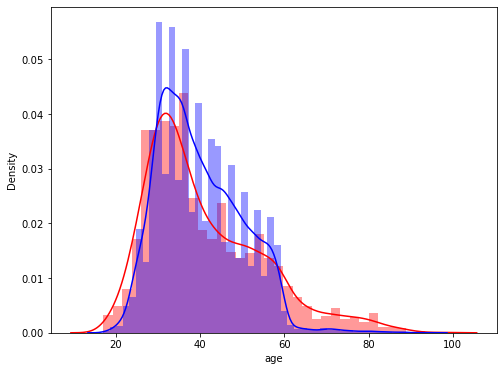

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['y']=='yes']['age'],color='r')
sns.distplot(df[df['y']=='no']['age'],color='b')
plt.show()

Dari data umur, diperoleh median data dari nasabah yang berlanggganan maupun tidak berlangganan di angka 38 tahun. Dikarenakan kedua data memiliki median umur yang sama, kita akan coba lakukan binning terhadap data umur untuk mendapatkan data yang lebih informatif.

Kita akan membagi umur ke dalam beberapa kategori sesuai dengan referensi [paper berikut](https://journals.scholarpublishing.org/index.php/ASSRJ/article/view/2924#:~:text=A%20person%20is%20now%20considered,long%2Dlivers%20are%20after%2090.). 



In [23]:
df['age']=df['age'].apply(lambda x: 'Youth' if 17<=x<25 else 'Young adults' if 25<=x<45 else 'Midle-Aged Adults' if 45<=x<60 else 'Old Adults' if 60<=x<75 else 'Senile Adults' if 75<=x<90 else 'Long-Livers' )
df['age'].value_counts()

Young adults         27179
Midle-Aged Adults    11738
Youth                 1067
Old Adults             923
Senile Adults          259
Long-Livers             10
Name: age, dtype: int64

In [24]:
def countplot(label, dataset):
    Y = df[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=df, hue="y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

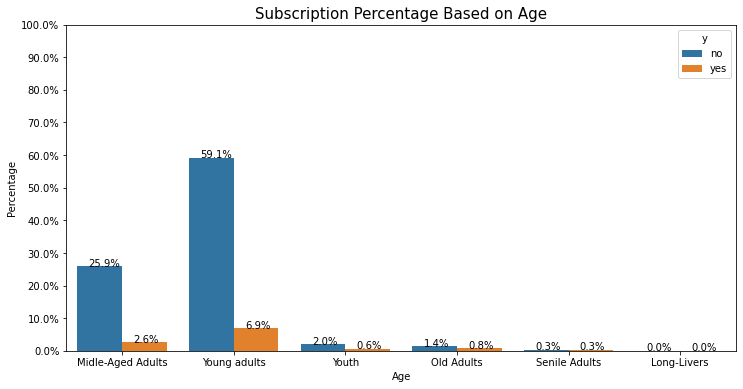

In [25]:
plt.figure(figsize=(12,6))
countplot('age',df)
plt.title('Subscription Percentage Based on Age',size=15)
plt.xlabel('Age',size=10)
plt.ylabel('Percentage',size=10)
plt.show()

Setelah dilakukan bining data age, diperoleh informasi bahwa persentase terbesar nasabah yang berlangganan produk deposit berjangka berasal dari kategori umur Young Adults (25-44 tahun), kemudian Midle-Aged Adults (45-59 tahun). Hal ini sangat relevan karena rentang umur 25-44 tahun dan  merupakan rentang umur produktif untuk menghasilkan uang dan berinvestasi.

### Fitur ``job``

In [26]:
round(df['job'].value_counts()*100/df['job'].value_counts().sum(),2)

admin.           26.11
blue-collar      22.47
technician       16.37
services          9.63
management        7.10
retired           4.17
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.13
Name: job, dtype: float64

Nasabah memiliki variasi jenis pekerjaan dengan mayoritas bekerja sebagai admin (26,11%), blue-collar (22,47%), technician (16,37%), dan paling sedikit sebagai pelajar (2,13%).

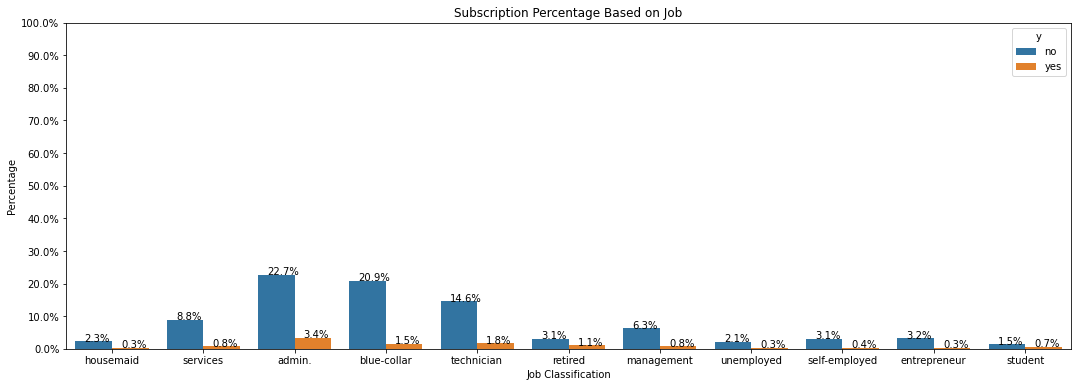

In [27]:
plt.figure(figsize=(18,6))
countplot('job',df)
plt.title('Subscription Percentage Based on Job')
plt.xlabel('Job Classification')
plt.ylabel('Percentage')
plt.show()

Dari hasil visualisasi data, didapati bahwa persentase terbesar calon nasabah yang berlangganan produk deposit berjangka memiliki latar belakang pekerjaan sebagai Admin (3,4%), Technician (1,8%), blue-collar (1,5%). 3 Pekerjaan diatas juga memiliki persentase tidak berlangganan terbesar. Hal ini dikarenakan pekerjaan tersebut adalah 3 pekerjaan mayoritas dari nasabah.

Berlangganan produk deposit berjangka memungkinkan terjadi karena jenis pekerjaan tersebut merupakan jenis pekerjaan dengan pendapatan menengah-keatas, jenis pekerjaan dengan kontrak kerja tertentu. Sehingga dapat mendorong nasabah untuk berinvestasi agar masa depan mereka lebih terjamin.

### Fitur ``marital``

In [28]:
round(df['marital'].value_counts()*100/df['marital'].value_counts().sum(),2)

married     60.72
single      28.08
divorced    11.20
Name: marital, dtype: float64

Nasabah mayoritas telah menikah (60,72%), single (28,08%), dan bercerai (11,20%).

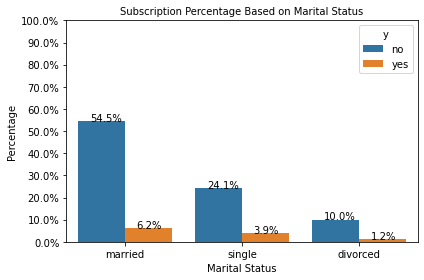

In [29]:
countplot('marital',df)
plt.title('Subscription Percentage Based on Marital Status',size=10)
plt.xlabel('Marital Status',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show()

Dari hasil visualisasi data, didapati bahwa persentase terbesar nasabah yang memutuskan berlangganan produk deposit berjangka memiliki status sudah menikah (6,2%). Hal ini memungkinkan karena nasabah melakukan saving untuk menyiapkan kebutuhan di masa depan mereka (hari tua, pendidikan anak, kesehatan, dan sebagainya).

### Fitur  ``education``

In [30]:
round(df['education'].value_counts()*100/df['education'].value_counts().sum(),2)

university.degree      31.12
high.school            23.87
basic.9y               15.78
professional.course    13.24
basic.4y               10.38
basic.6y                5.56
illiterate              0.04
Name: education, dtype: float64

Nasabah memiliki latar belakang pendidikan yang beragam dengan mayoritas berlatar pendidikan university degree (31,12%), high school (23,87%), dan paling sedikit adalah illiterate (0.04%).

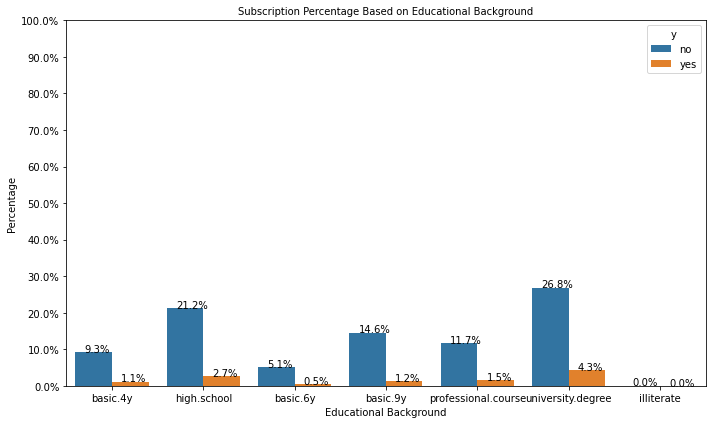

In [31]:
plt.figure(figsize=(10,6))
countplot('education',df)
plt.title('Subscription Percentage Based on Educational Background',size=10)
plt.xlabel('Educational Background',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show()

Dari hasil visualisasi data, didapati bahwa persentase terbesar nasabah yang berlangganan produk deposit berjangka memiliki latar belakang pendidikan University Degree (4,3%) dan High School (2,7%). Hal ini sangat relevan karena memiliki pendidikan yang cukup biasanya berkorelasi dengan tingkat literasi keuangan yang baik.

### Fitur ``default``, ``housing``, ``loan``

In [32]:
round(df['default'].value_counts()*100/df['default'].value_counts().sum(),2)

no               79.12
Not Available    20.88
yes               0.01
Name: default, dtype: float64

Mayoritas nasabah tidak memiliki kredit macet (79,12%). Selanjutnya kita akan drop baris pada kolom ``default`` yang memiliki nilai 'yes' karena memiliki proporsi yang terlalu kecil dan berpotensi menganggu splitting data.

In [33]:
round(df['housing'].value_counts()*100/df['housing'].value_counts().sum(),2)

yes    54.79
no     45.21
Name: housing, dtype: float64

Mayoritas calon nasabah memiliki pinjaman rumah (54,79%).

In [34]:
round(df['loan'].value_counts()*100/df['loan'].value_counts().sum(),2)

no     84.83
yes    15.17
Name: loan, dtype: float64

Mayoritas calon nasabah tidak memiliki pinjaman pribadi (84,83%).

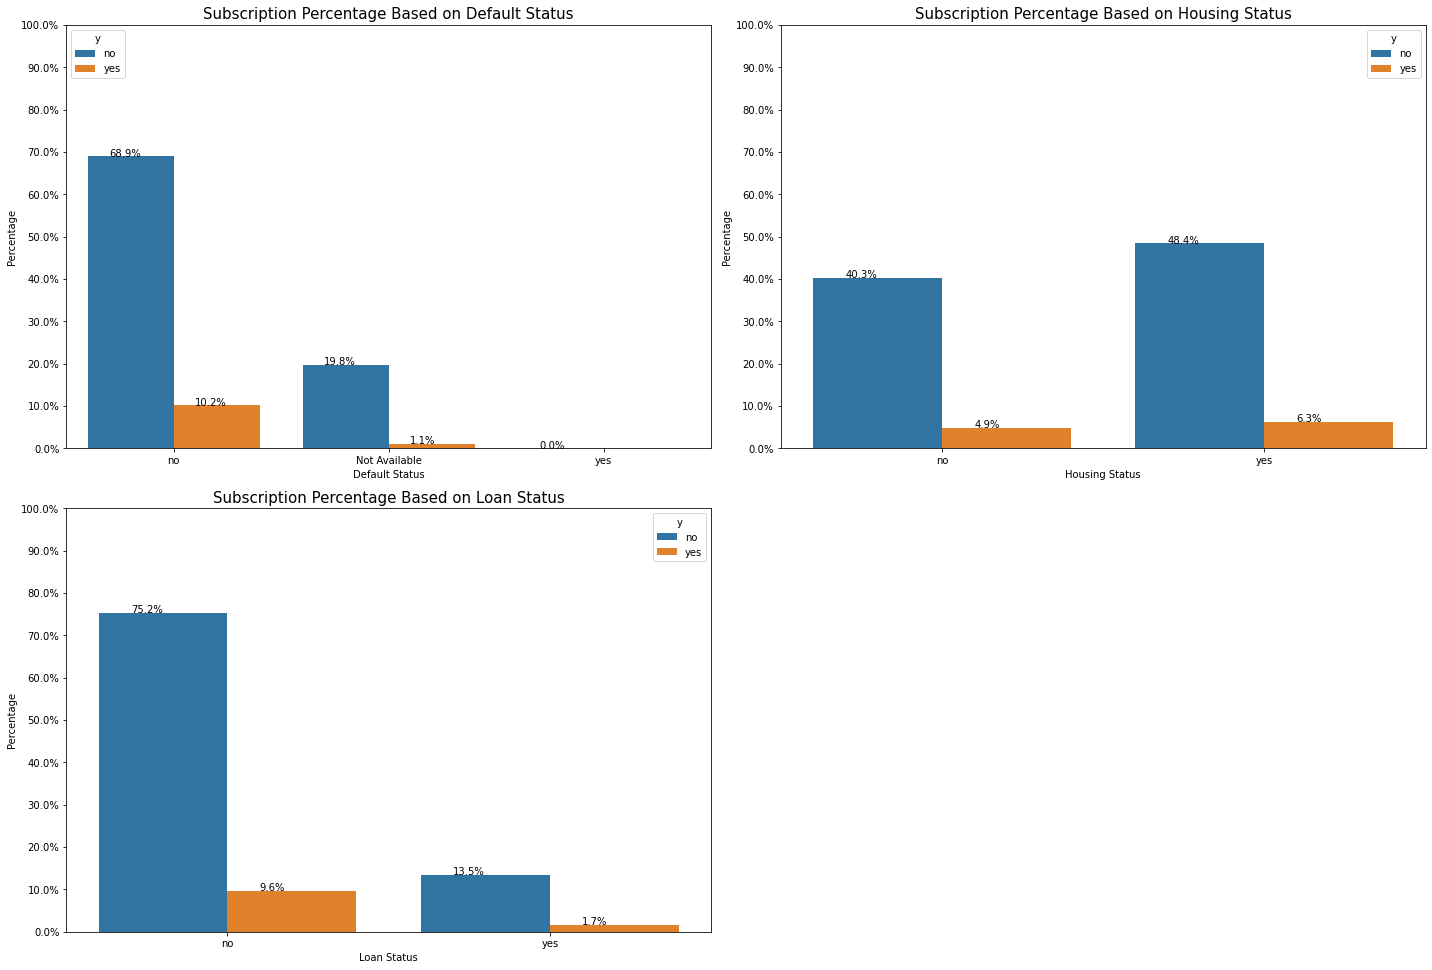

In [35]:
plt.figure(figsize=(20,40))
# Default Feature
plt.subplot(6,2,1)
countplot('default',df)
plt.title('Subscription Percentage Based on Default Status',size=15)
plt.xlabel('Default Status',size=10)
plt.ylabel('Percentage',size=10)

# Housing Feature
plt.subplot(6,2,2)
countplot('housing',df)
plt.title('Subscription Percentage Based on Housing Status',size=15)
plt.xlabel('Housing Status',size=10)
plt.ylabel('Percentage',size=10)

# Loan Feature
plt.subplot(6,2,3)
countplot('loan',df)
plt.title('Subscription Percentage Based on Loan Status',size=15)
plt.xlabel('Loan Status',size=10)
plt.ylabel('Percentage',size=10)

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi data, kita peroleh informasi sebagai berikut:

**Subscription Percentage Based on Default**\
Nasabah yang berlanganan produk deposit berjangka mayoritas tidak memiliki kredit macet (10,2%). Hal ini memungkinkan karena nasabah yang tidak memiliki kredit macet artinya memiliki kemampuan ekonomi dan neraca keuangan yang baik, sehingga dapat mengalokasikan uang berlebih untuk diinvestasikan.

**Subscription Percentage Based on Housing**\
Nasabah yang berlanganan produk deposit berjangka mayoritas memiliki pinjaman cicilan rumah (6,3%). Hal ini memungkinkan karena memiliki cicilan rumah artinya memiliki kemampuan ekonomi yang cukup, sehingga apabila memiliki uang berlebih dapat dialokasikan untuk disimpan dalam instrumen keuangann lainnya.

**Subscription Percentage Based on Loan**\
Nasabah yang berlanganan produk deposit berjangka mayoritas tidak memiliki pinjaman pribadi (9,6%). Hal ini memungkinkan karena nasabah yang tidak memiliki pinjaman pribadi artinya memiliki kemampuan ekonomi dan neraca keuangan yang baik, sehingga dapat mengalokasikan uang berlebih untuk disimpan dalam instrumen keuangann lainnya.

## Related with the last contact of the current campaign

### Fitur ``contact``

In [36]:
round(df['contact'].value_counts()*100/df['contact'].value_counts().sum(),2)

cellular     63.47
telephone    36.53
Name: contact, dtype: float64

Pihak bank melakukan panggilan telepon kepada nasabah mayoritas melalui telepon seluler (63,47%).

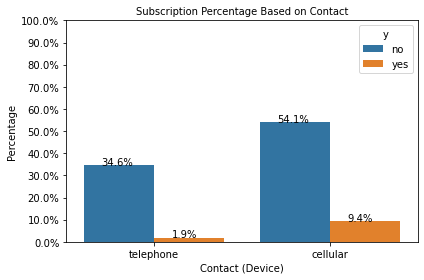

In [37]:
countplot('contact',df)
plt.title('Subscription Percentage Based on Contact',size=10)
plt.xlabel('Contact (Device)',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show()

Dari hasil visualisasi data, diperoleh informasi nasabah yang berlanganan produk deposit berjangka mayoritas mendapatkan panggilan telepon melalui telepon seluler (9,4%). Hal ini memungkinkan karena di era kemajuan teknologi telepon seluler menjadi gadget yang paling sering digunakan oleh masyarakat, sehingga sangat mudah untuk menerima panggilan dari orang lain.

### Fitur ``month``

In [38]:
round(df['month'].value_counts()*100/df['month'].value_counts().sum(),2)

may    33.43
jul    17.41
aug    15.00
jun    12.92
nov     9.96
apr     6.39
oct     1.74
sep     1.38
mar     1.33
dec     0.44
Name: month, dtype: float64

Pihak bank melakukan panggilan telepon kepada calon nasabah paling banyak di bulan Mei (33,43%), Juli (17,41%), Agustus (15%). dan Juni (12,92%). 4 bulan tersebut merupakan 4 bulan berurutan, sehingga nanti kita akan analisa lebih lanjut keempat bulan ini.

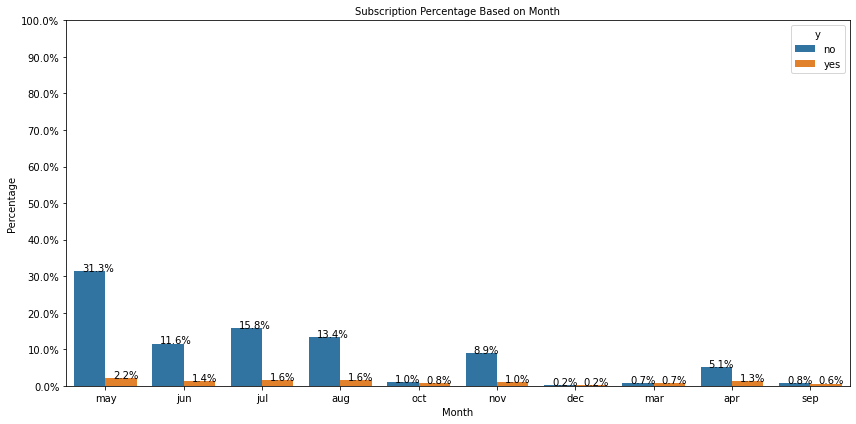

In [39]:
plt.figure(figsize=(12,6))
countplot('month',df)
plt.title('Subscription Percentage Based on Month',size=10)
plt.xlabel('Month',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show()

Dari hasil visualisasi data, diperoleh informasi nasabah yang berlanganan produk deposit berjangka mayoritas mendapatkan panggilan telepon di Bulan Mei (2,2%). Terdapat pola menarik karena nasabah yang berlangganan produk mendapatkan panggilan telepon terbanyak di 4 bulan kedua (April, Juni, Juli, Agustus). Kita akan melihat analisa lebih lanjut tentang keempat bulan ini.

In [40]:
index_may=df.loc[(df['y']=='yes')&(df['month']=='may')]['month'].index
index_jun=df.loc[(df['y']=='yes')&(df['month']=='jun')]['month'].index
index_jul=df.loc[(df['y']=='yes')&(df['month']=='jul')]['month'].index
index_aug=df.loc[(df['y']=='yes')&(df['month']=='aug')]['month'].index

In [41]:
display(index_may,index_jun,index_jul,index_aug)

Int64Index([   75,    83,    88,   129,   139,   182,   286,   388,   389,
              446,
            ...
            39754, 39755, 39756, 39760, 39763, 39764, 39767, 39772, 39774,
            39776],
           dtype='int64', length=886)

Int64Index([ 7793,  7808,  7814,  7817,  7819,  7835,  7881,  7933,  7952,
             7983,
            ...
            39992, 39993, 39996, 39998, 39999, 40001, 40002, 40004, 40005,
            40008],
           dtype='int64', length=559)

Int64Index([12139, 12191, 12195, 12264, 12322, 12384, 12385, 12387, 12425,
            12433,
            ...
            40300, 40301, 40302, 40305, 40309, 40310, 40312, 40313, 40315,
            40317],
           dtype='int64', length=648)

Int64Index([18845, 18912, 18986, 18989, 19000, 19001, 19005, 19010, 19011,
            19018,
            ...
            40513, 40514, 40517, 40542, 40543, 40544, 40546, 40547, 40548,
            40552],
           dtype='int64', length=655)

Dari informasi yang kita dapatkan, bulan Mei, Juni, Juli (T) Agustus terdapat di indeks awal dan di akhir. Berdasarkan informasi dataset diurutkan berdasarkan waktu (May 2008 - November 2010). Kita tidak bisa mendapatkan analisa yang akurat karena tidak memiliki informasi relevan lainnya terhadap waktu.

### Fitur  ``day_of_week``

In [42]:
round(df['day_of_week'].value_counts()*100/df['day_of_week'].value_counts().sum(),2)

thu    20.93
mon    20.67
wed    19.75
tue    19.64
fri    19.01
Name: day_of_week, dtype: float64

Pihak bank melakukan panggilan telepon kepada calon nasabah paling banyak di hari Selasa (20,93%), Senin (20,67%). Namun panggilan telepon juga dilakukan di hari kerja lainnya dengan persentase yang hampir sama dengan hari senin dan selasa. Sehingga kita menganggap bahwa panggilan telepon dilakukan dengan persentase sama setiap harinya di hari kerja.

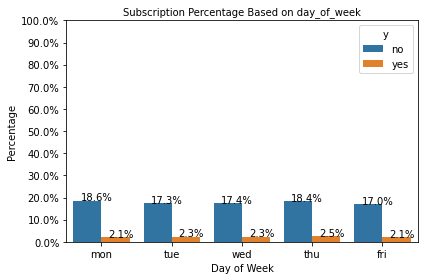

In [43]:
countplot('day_of_week',df)
plt.title('Subscription Percentage Based on day_of_week',size=10)
plt.xlabel('Day of Week',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show()           

Dari hasil visualisasi data, nasabah yang berlanganan produk deposit berjangka mayoritas mendapatkan panggilan telepon di hari Kamis (2,5%). Namun, kita melihat bahwa nasabah yang berlangganan produk mendapatkan panggilan telepon di tiap hari kerja dengan persentase yang relatif sama. Kita akan melakukan uji statistik untuk mengecek signifikansi dari fitur ini, apakah selanjutnya fitur ini akan di drop atau digunakan.

#### Statistic Test

Kita akan melakukan uji statistik untuk fitur days_of_week dengan menggunakan uji proporsi, apakah nilai dari hari memiliki proporsi yang sama antar nilainya. Apabila fitur tidak signifikan, maka kita akan drop fitur tersebut agar tidak digunakan dalam pembuatan model.

**Proportion Test**\
Kita menggunakan uji chi square untuk menguji apakah dua variabel kategorikan memiliki hubungan satu dengan hal lain. (Chi square test for independence)

Pertanyaan : Apakah hari saat mendapat panggilan telepon mempengaruhi tingkat berlangganan produk ?

Ho: Hari saat mendapat panggilan telepon tidak memiliki keterkaitan terhadap berlangganan produk

Ha: Hari saat mendapat panggilan telepon memiliki keterkaitan terhadap berlangganan produk


In [44]:
pd.crosstab(df['day_of_week'],df['y'])

y,no,yes
day_of_week,,
fri,6980,846
mon,7665,847
thu,7574,1044
tue,7133,953
wed,7185,949


In [45]:
chi2_contingency(pd.crosstab(df['day_of_week'],df['y']))
#output: stats, pval, degree of freedom, expected value

(26.05424369275085,
 3.085754965631743e-05,
 4,
 array([[6944.30158345,  881.69841655],
        [7553.01496017,  958.98503983],
        [7647.07271226,  970.92728774],
        [7175.00927725,  910.99072275],
        [7217.60146687,  916.39853313]]))

In [46]:
stats,pval,dof,expected=chi2_contingency(pd.crosstab(df['day_of_week'],df['y']))

if pval<=0.05:
    print('Tolak Ho')
else:
    print('Terima Ho') 
    
print(f'pval = {pval}')

Tolak Ho
pval = 3.085754965631743e-05


Dari hasil uji proporsi, didapatkan hasil tolak Ho dengan nilai Pval <0.05 .Sehingga dapat disimpulkan bahwa hari dimana nasabah mendapat panggilan telepon memiliki keterkaitan terhadap berlangganan produk, sehingga fitur dapat digunakan untuk Modelling

### Fitur  ``duration`` `

<AxesSubplot:xlabel='y', ylabel='duration'>

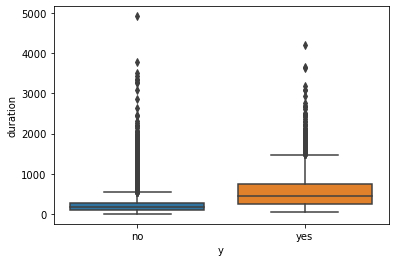

In [47]:
sns.boxplot(x='y', y='duration', data=df)

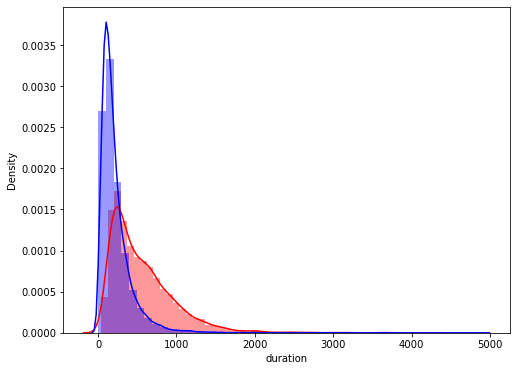

In [48]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['y']=='yes']['duration'],color='r')
sns.distplot(df[df['y']=='no']['duration'],color='b')
plt.show()


In [49]:
q1_duration=df[df['y']=='yes'].quantile(.25)['duration']
print(f'Q1 dari durasi = {q1_duration}')
q2_duration=df[df['y']=='yes'].quantile(.50)['duration']
print(f'Median dari durasi = {q2_duration}')
q3_duration=df[df['y']=='yes'].quantile(.70)['duration']
print(f'Q3 dari durasi = {q3_duration}')

Q1 dari durasi = 253.5
Median dari durasi = 449.0
Q3 dari durasi = 676.0


Dari data ``duration``, diperoleh median data durasi dari nasabah yang berlanggganan adalah 449 detik/15 menit. Namun, terlihat durasi memiliki cukup banyak outlier, sehingga kita akan lakukan binning terhadap data durasi untuk mendapatkan data yang lebih informatif.

In [50]:
df['duration']=df['duration'].apply(lambda x: '0-5' if 0<=(x/60)<5 else '5-10' if 5<=(x/60)<10 else '10-15' if 10<=(x/60)<15 else '15-20' if 15<=(x/60)<20 else '>20')
df['duration'].value_counts()

0-5      29928
5-10      7770
10-15     2194
15-20      769
>20        515
Name: duration, dtype: int64

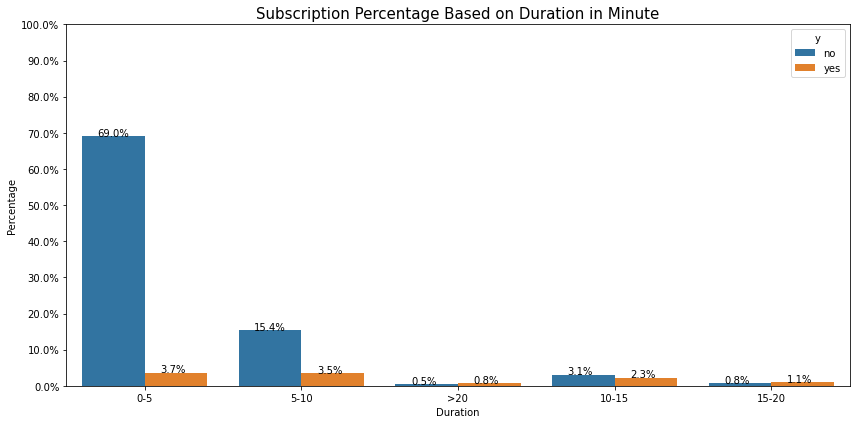

In [51]:
plt.figure(figsize=(12,6))
countplot('duration',df)
plt.title('Subscription Percentage Based on Duration in Minute',size=15)
plt.xlabel('Duration',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show()

Dari hasil visualisasi, diperoleh informasi bahwa nasabah yang berlangganan produk paling banyak mendapatkan panggilan telepon dengan durasi antara 0-5 menit, dilanjutkan dengan 5-10 menit.

Hal ini juga dikuatkan oleh informasi dari sumber data bahwa fitur sangat memiliki pengaruh terhadap output target. Namun, karena durasi dilakukan setelah ada panggilan telepon maka kita tidak akan menggunakan fitur ini untuk prediksi, sehingga kita akan drop fitur  ``duration``.

## Other attributes

### Fitur  ``campaign`` 

<AxesSubplot:xlabel='y', ylabel='campaign'>

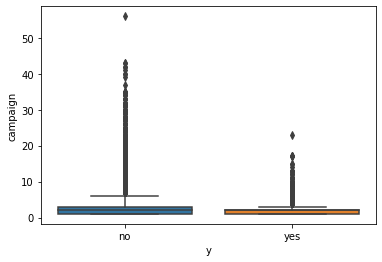

In [52]:
sns.boxplot(x='y', y='campaign', data=df)

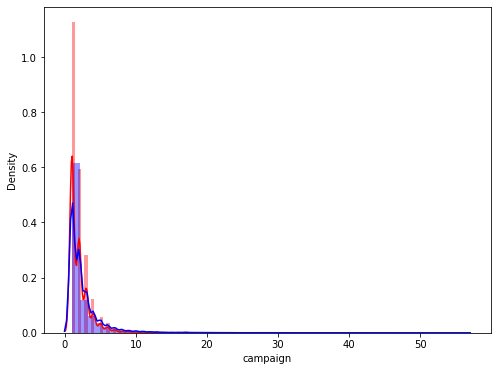

In [53]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['y']=='yes']['campaign'],color='r')
sns.distplot(df[df['y']=='no']['campaign'],color='b')
plt.show()

In [54]:
df['campaign'].value_counts()

1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
26        8
28        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
42        2
40        2
41        1
56        1
39        1
37        1
Name: campaign, dtype: int64

In [55]:
q1_campaign=df[df['y']=='yes'].quantile(.25)['campaign']
print(f'Q1 dari campaign dengan target yes = {q1_campaign}')
q2_campaign=df[df['y']=='yes'].quantile(.50)['campaign']
print(f'Median dari campaign dengan target yes = {q2_campaign}')
q3_campaign=df[df['y']=='yes'].quantile(.75)['campaign']
print(f'Q3 dari campaign dengan target yes = {q3_campaign}')

Q1 dari campaign dengan target yes = 1.0
Median dari campaign dengan target yes = 2.0
Q3 dari campaign dengan target yes = 2.0


In [56]:
q1_campaign_no=df[df['y']=='no'].quantile(.25)['campaign']
print(f'Q1 dari campaign dengan target no = {q1_campaign_no}')
q2_campaign_no=df[df['y']=='no'].quantile(.50)['campaign']
print(f'Median dari campaign dengan target no = {q2_campaign_no}')
q3_campaign_no=df[df['y']=='no'].quantile(.75)['campaign']
print(f'Q3 dari campaign dengan target no = {q3_campaign_no}')

Q1 dari campaign dengan target no = 1.0
Median dari campaign dengan target no = 2.0
Q3 dari campaign dengan target no = 3.0


Dari data campaign, terlihat bahwa nasabah yang tidak berlangganan produk deposit berjangka sedikit lebih banyak mendapatkan panggilan telepon dari pihak bank ketimbang yang berlangganan. Namun, ketika kita analisis boxplot lebih lanjut, didapatkan bahwa median dari kedua data memiliki nilai yang sama yaitu sama-sama mendapatkan panggilan telepon sebanyak 2x. Dikarenakan kedua data memiliki median yang sama, maka kita akan melakukan uji statistik untuk melihat signifikansi dari fitur.

#### Statistic Test


**Mann Whitney U**\
Kita akan melakukan uji statistik untuk fitur campaign dengan menggunakan uji mann whitney u, untuk membandingkan nilai median dari 2 populasi independen.

Ho: Median dari campaign yang berlangganan sama dengan yang tidak berlangganan

Ha: Median dari campaign yang berlangganan tidak sama dengan yang tidak berlangganan (two tailed)


In [57]:
mannwhitneyu(df[df['y']=='yes']['campaign'],df[df['y']=='no']['campaign'])

MannwhitneyuResult(statistic=75391969.5, pvalue=1.8146913584229173e-38)

In [58]:
stats,pval=mannwhitneyu(
    df[df['y']=='yes']['campaign'],
    df[df['y']=='no']['campaign'],
)
print(pval)

if pval<=0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

1.8146913584229173e-38
Tolak Ho


Dari hasil uji Mann Whitney U, didapatkan hasil tolak Ho dengan nilai Pval <0.05 .Sehingga dapat disimpulkan bahwa nilai median campaign yang berlangganan tidak sama dengan campaign yang berlangganan.

### Fitur  ``pdays`` 

<AxesSubplot:xlabel='y', ylabel='pdays'>

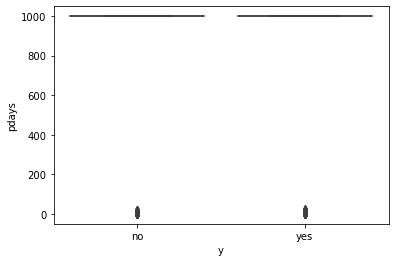

In [59]:
sns.boxplot(x='y', y='pdays', data=df)

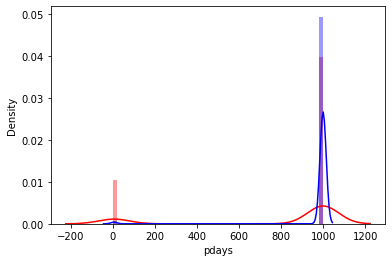

In [60]:
sns.distplot(df[df['y']=='yes']['pdays'],color='r')
sns.distplot(df[df['y']=='no']['pdays'],color='b')
plt.show()

In [61]:
df[df['y']=='yes']['pdays'].value_counts()

999    3672
3       298
6       289
4        63
7        40
2        37
9        35
10       30
5        29
13       28
12       26
15       16
11       15
8        12
14       11
0        10
1         8
16        6
18        4
21        2
17        2
22        2
25        1
26        1
19        1
27        1
Name: pdays, dtype: int64

In [62]:
df[df['y']=='no']['pdays'].value_counts()

999    35989
3        141
6        123
4         55
12        32
9         29
2         24
10        22
7         20
1         18
5         17
11        13
14         9
13         8
15         8
17         6
8          6
0          5
16         5
18         3
19         2
20         1
22         1
Name: pdays, dtype: int64

Dari data pdays diperoleh informasi bahwa nasabah yang berlangggaan produk deposit berjangka mayoritas belum mendapatkan panggilan telepon sebelumnya. Apabila pernah mendapatkan panggilan telepon, maka panggilan telepon berikutnya dilakukan <= 10 hari setelah panggilan telepon terakhir.

### Fitur  ``previous`` 

<AxesSubplot:xlabel='y', ylabel='previous'>

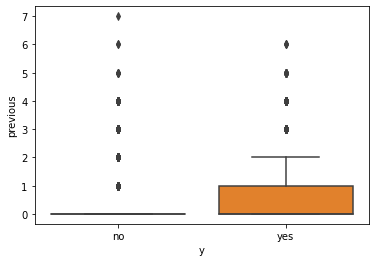

In [63]:
sns.boxplot(x='y', y='previous', data=df)

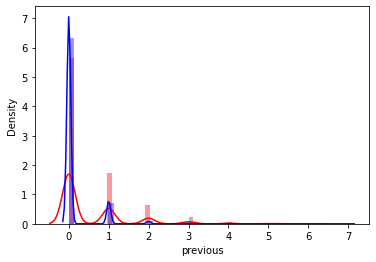

In [64]:
sns.distplot(df[df['y']=='yes']['previous'],color='r')
sns.distplot(df[df['y']=='no']['previous'],color='b')
plt.show()

In [65]:
q1_previous=df[df['y']=='yes'].quantile(.25)['previous']
print(f'Q1 dari previous dengan target yes = {q1_previous}')
q2_previous=df[df['y']=='yes'].quantile(.50)['previous']
print(f'Median dari previous dengan target yes = {q2_previous}')
q3_previous=df[df['y']=='yes'].quantile(.75)['previous']
print(f'Q3 dari previous dengan target yes = {q3_previous}')

Q1 dari previous dengan target yes = 0.0
Median dari previous dengan target yes = 0.0
Q3 dari previous dengan target yes = 1.0


In [66]:
df.loc[df['y']=='yes']['previous'].value_counts()

0    3140
1     967
2     350
3     128
4      38
5      13
6       3
Name: previous, dtype: int64

Dari data previous, diperoleh informasi bahwa mayoritas tidak mendapatkan panggilan telepon pada kampanye sebelumnya.\
Berdasarkan korelasi, fitur ``pdays``  dan ``previous`` memiliki korelasi sedang (-0,51). Selanjutnya kita akan melihat grafik antara dua fitur ini.

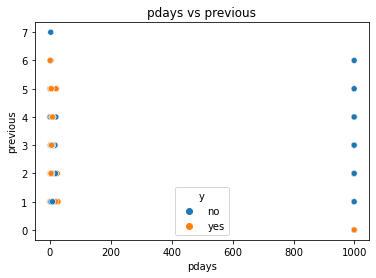

In [67]:
sns.scatterplot(x='pdays', y='previous', data=df, hue='y')
plt.title('pdays vs previous')
plt.show()

Dari grafik korelasi antara pdays dan previous, terlihat bahwa nasabah yang berlangganan produk adalah nasabah yang tidak mendapatkan panggilan telepon sebelumnya (previous=0 dan pdays=999).

### Fitur  ``poutcome`` 

In [68]:
round(df['poutcome'].value_counts()*100/df['poutcome'].value_counts().sum(),2)

nonexistent    86.34
failure        10.33
success         3.33
Name: poutcome, dtype: float64

Pihak bank tidak melakukan campaign sebelumnya(86,34%). Sehingga dapat disimpulkan bahwa 86,34% merupakan nasabah baru yang mendapatkan panggilan telepon dari pihak bank untuk menawarkan berlangganan produk deposit berjangka.

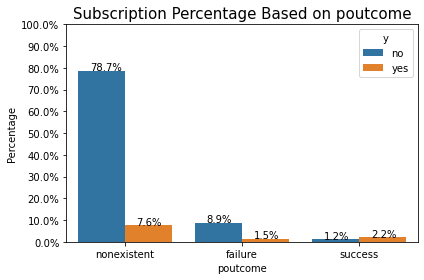

In [69]:
countplot('poutcome',df)
plt.title('Subscription Percentage Based on poutcome',size=15)
plt.xlabel('poutcome',size=10)
plt.ylabel('Percentage',size=10)

plt.tight_layout()
plt.show()

Dari hasil visualisasi data, diperoleh informasi nasabah yang berlanganan produk deposit berjangka mayoritas tidak mendapatkan kampanye marketing sebelumnya (7,6%). Artinya nasabah yang berlangganan produk deposit berjangka merupakan nasabah baru hasil konversi telermarketing campaign. Informasi ini mendukung data pada fitur ``previous`` dan ``pdays``  yang menyatakan bahwa mayoritas nasabah tidak pernah mendapatkan panggilan telepon sebelumnya.

Karena fitur ``poutcome`` memiliki kemiripan hasil dengan fitur ``previous`` dan ``pdays``, maka kita hanya akan gunakan fitur ``poutcome`` dan drop 2 fitur lainnya.

## Social and economic context attributes 

### Fitur  ``emp.var.rate`` 

<AxesSubplot:xlabel='y', ylabel='emp.var.rate'>

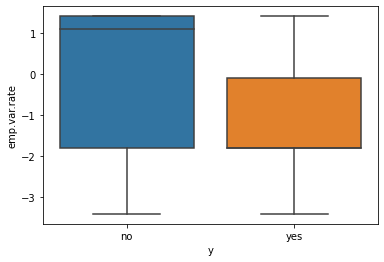

In [70]:
sns.boxplot(x='y', y='emp.var.rate', data=df)

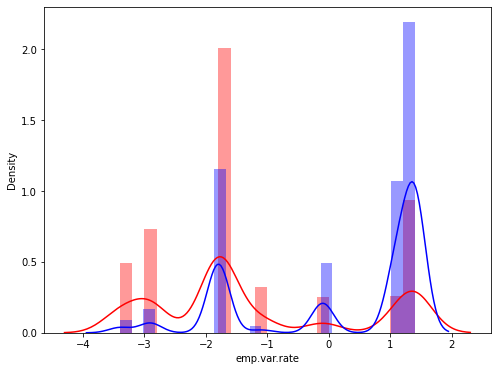

In [71]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['y']=='yes']['emp.var.rate'],color='r')
sns.distplot(df[df['y']=='no']['emp.var.rate'],color='b')

plt.show()

``emp.var.rate`` menandakan tingkat penyerapan tenaga kerja. Apabila ``emp.var.rate`` rendah artinya unemployment rate tinggi yang menandakan kondisi ekonomi tidak baik. Dari hasil visualisasi, kita mendapatkan informasi bahwa nasabah cenderung untuk berlangganan deposit berjangka ketika ``emp.var.rate`` rendah atau saat kondisi ekonomi tidak baik. Hal ini dikarenakan masyarakat lebih memilih untuk menyimpan uangnya kedalam instrumen yang lebih aman pada saat tingkat penyerapan tenaga kerja/ lapangan pekerjaan rendah untuk mempersiapkan kemungkinan lain apabila terjadi kondisi yang tidak diduga seperti pemutusan hubungan kerja, dsb.

### Fitur  ``cons.price.idx`` 

<AxesSubplot:xlabel='y', ylabel='cons.price.idx'>

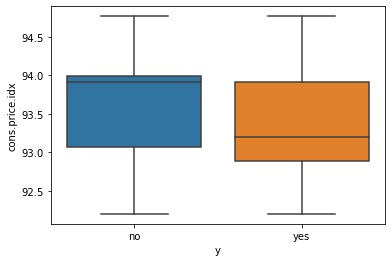

In [72]:
sns.boxplot(x='y', y='cons.price.idx', data=df)

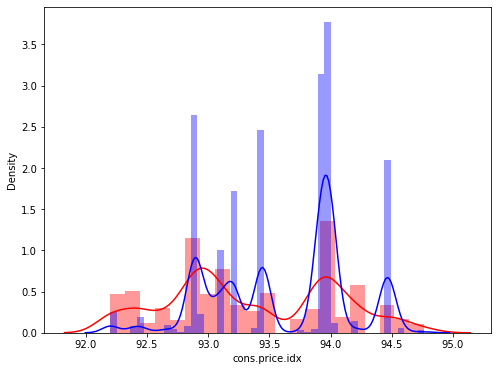

In [73]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['y']=='yes']['cons.price.idx'],color='r')
sns.distplot(df[df['y']=='no']['cons.price.idx'],color='b')

plt.show()

``cons.price.idx`` atau consumer price index adalah index rata-rata harga barang konsumsi dari semua sektor (dengan indeks normal di angka 100). Apabila ``cons.price.idx`` naik, maka kecenderungan nasabah yang deposit akan naik karena kecenderungan inflasi atau harga barang konsumsi akan naik. Dari hasil visualisasi, diperoleh informasi bahwa ketika nilai ``cons.price.idx`` naik, maka orang yang berlangganan deposito juga semakin banyak. Namun, terlihat pula ketika ``cons.price.idx`` naik, orang yang tidak berlangganan deposito juga ikut naik. Hal ini bisa dikarenakan faktor lain yaitu kondisi ekonomi yang tidak baik, dimana orang lebih memilih untuk menyimpan/memegang duit cash untuk memenuhi kebutuhan hidup sehari-hari saat kondisi krisis keuangan.

### Fitur  ``cons.conf.idx`` 

<AxesSubplot:xlabel='y', ylabel='cons.conf.idx'>

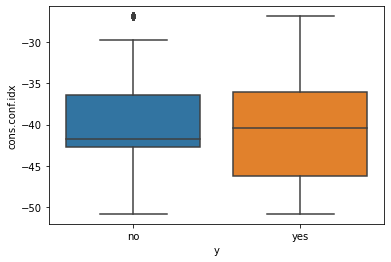

In [74]:
sns.boxplot(x='y', y='cons.conf.idx', data=df)

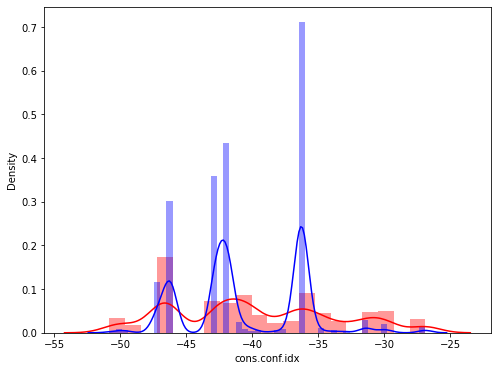

In [75]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['y']=='yes']['cons.conf.idx'],color='r')
sns.distplot(df[df['y']=='no']['cons.conf.idx'],color='b')

plt.show()

``cons.conf.idx`` atau consumer confidence index adalah tingkat kepercayaan masyarakat terhadap kondisi ekonomi. ``cons.price.idx`` yang rendah dapat mencerminkan bahwa kondisi ekonomi suatu negara sedang tidak baik, maka dari itu masyarakat akan cenderung lebih konservatif dalam mengatur keuangannya. Dalam hal ini, ``cons.price.idx`` berada dalam posisi minus yang berarti kondisi ekonomi sedang tidak baik. Dari hasil visualisasi, kita mendapatkan informasi bahwa jumlah orang yang berlangganan deposito semakin sedikit seiring dengan naiknya ``cons.price.idx``. Namun, terlihat pula bahwa nasabah berlangganan deposit berjangka pada kondisi ``cons.price.idx`` manapun.


### Fitur  ``euribor3m`` 

<AxesSubplot:xlabel='y', ylabel='euribor3m'>

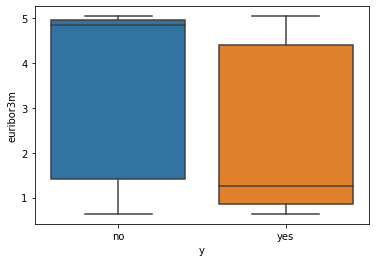

In [76]:
sns.boxplot(x='y', y='euribor3m', data=df)

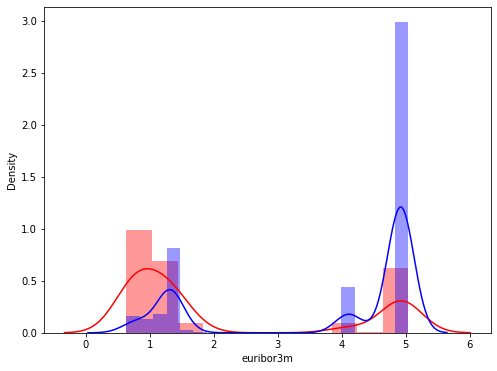

In [77]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['y']=='yes']['euribor3m'],color='r')
sns.distplot(df[df['y']=='no']['euribor3m'],color='b')

plt.show()

Dari info diatas, kita dapat lihat orang yang melakukan deposit tersebar pada suku bunga berapapun. Namun yang menarik ketika interest rate 5% justru orang banyak tidak berlangganan deposito. Hal ini bisa dikarenakan faktor lain yaitu kondisi ekonomi yang sedang tidak baik, sehingga nasabah memilih untuk menyimpan/ memegang duit cash.

Selanjutnnya kita akan melihat hubungan antara ``cons.price.idx`` , ``cons.conf.idx`` , ``euribor3m`` terhadap target

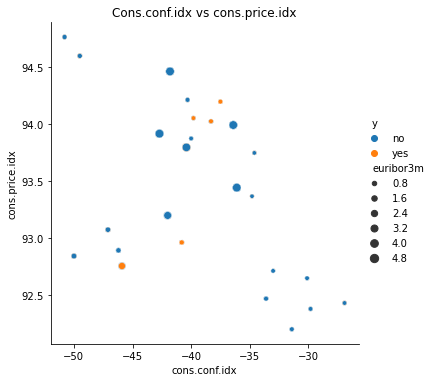

In [78]:
sns.relplot(x='cons.conf.idx', y='cons.price.idx', data=df, kind='scatter', size='euribor3m', hue='y')
plt.title('Cons.conf.idx vs cons.price.idx')
plt.show()

Dari hasil visualisasi data, kita dapat melihat bahwa nasabah kebanyakan berlangganan produk pada saat nilai ``cons.price.idx`` naik dan nilai ``cons.conf.idx`` rendah. ``cons.price.idx`` menandakan bahwa indeks harga konsumen/ harga barang-barang konsumsi. Hal ini sesuai dengan analisa dari masing-masing fitur terhadap target. Namun, hal yang menarik adalah nasabah berlangganan deposito pada saat tingkat bunga deposito rendah. Hal ini bisa dipengaruhi beberapa faktor:
* Nasabah kurang memahami informasi tentang deposito
* Konsisi keuangan nasional tidak stabil, sehingga masyarakat lebih memilih untuk memegang uang cash untuk mencukup kebutuhan hidup sehari-hari.

### Fitur  ``nr.employed`` 

<AxesSubplot:xlabel='y', ylabel='nr.employed'>

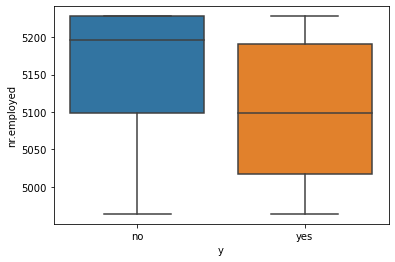

In [79]:
sns.boxplot(x='y', y='nr.employed', data=df)

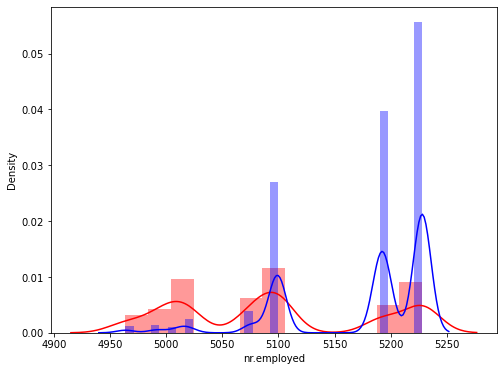

In [80]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['y']=='yes']['nr.employed'],color='r')
sns.distplot(df[df['y']=='no']['nr.employed'],color='b')

plt.show()

``nr.empolyed`` menanadakan jumlah penyerapan tenaga kerja. Apabila ``nr.empolyed`` rendah artinya jumlah unemployment tinggi yang menandakan kondisi ekonomi sedang tidak stabil. Dari hasil visualisasi, kita mendapatkan informasi bahwa nasabah cenderung untuk berlangganan deposit berjangka ketika ``nr.empolyed`` rendah atau saat kondisi ekonomi kurang stabil. Hal ini dikarenakan masyarakat lebih memilih untuk menyimpan uangnya kedalam instrumen yang lebih aman pada saat jumlah penyerapan tenaga kerja/ lapangan pekerjaan rendah untuk mempersiapkan kemungkinan lain apabila terjadi kondisi yang tidak diduga.

Sekarang kita akan melihat hubungan antara ``emp.var.rate`` , ``nr.empolyed``, ``euribor3m`` terhadap target.



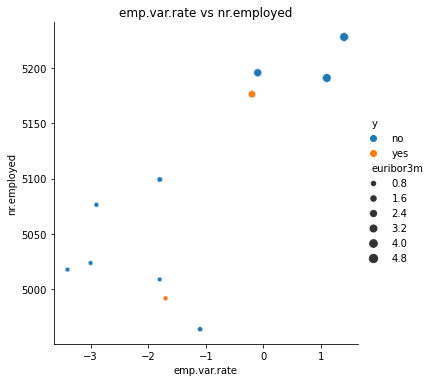

In [81]:
sns.relplot(x='emp.var.rate', y='nr.employed', data=df, kind='scatter', size='euribor3m', hue='y')
plt.title('emp.var.rate vs nr.employed')
plt.show()

Dari hasil visualisasi, terlihat bahwa ``nr.employed`` dan ``emp.var.rate`` berbanding lurus, bahwa nasabah berlangganan produk deposit berjangka pada saat kondisi keuangan sedang tidak baik. Hal yang sama ditemukan adalah nasabah berlangganan deposito pada saat tingkat bunga deposito rendah. Hal ini bisa dipengaruhi beberapa faktor:
* Nasabah kurang memahami informasi tentang deposito
* Konsisi keuangan nasional tidak stabil, sehingga masyarakat lebih memilih untuk memegang uang cash untuk mencukup kebutuhan hidup sehari-hari.

## Output variables (fitur ``y`` )

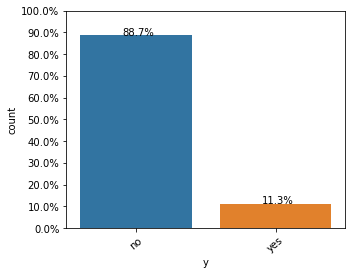

In [82]:
plt.figure(figsize=(5,4))
Y = df['y']
total = len(Y)*1.
ax=sns.countplot(x='y', data=df)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()+5))
    
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='center')
# ax.legend(labels=["no","yes"])
plt.show()

Dari data analisis target, didapatkan informasi bahwa mayoritas nasabah tidak berlangganan produk deposit berjangka setelah dilakukan telemarkating campaign oleh pihak Bank. Hanya 11,3% calon nasabah yang berlangganan deposit berjangaka setelah dilakukan telemarkating campaign oleh pihak Bank. Didapatkan juga bahwa data bersifat imbalance sehingga perlu dilakukan feature engineering/ metode lainnya agar model yang dihasilkan memiliki kinerja yang lebih baik

## Data Analysis Summary

Secara umum, fitur-fitur yang telah dianalisa memiliki korelasi dengan berlangganan atau tidaknya nasabah melalui telemarketing campaign. Fitur dalam kategori ``Social and economic context attributes`` merupakan indikator yang terpisah dan tidak melekat kepada nasabah langsung, karena indikator ini mencerminkan kondisi ekonomi nasional dan bukan cerminan informasi nasabah.

Berdasarkan fitur-fitur yang telah dianalisa, kita dapat memberikan rekomendasi kepada tim Marketing untuk melakukan telemarketing dengan persyaratan sebagai berikut:
* Panggilan telepon telepon dilakukan melalui telepon seluler sebanyak 2x dalam setahun, dengan durasi 0-5 menit di setiap panggilan teleponnya
* Panggilan telepon dapat dilakukan di hari apapaun dan bulan apapun
* Panggilan telepon dilakukan kepada nasabah dengan profil sebagai berikut
    * **Calon Nasabah Prioritas 1**:
        * Memiliki rentang umur 25 - 44 tahun
        * Bekerja sebagai admin/blue collar/technician/management
        * Berstatus sudah menikah/single
        * Memiliki latar belakang pendidikan minimal university.degree
        * Belum pernah mendapatkan telemarketing campaign sebelumnya
    * **Calon Nasabah Prioritas 2**:
        * Memiliki rentang umur 45 - 59 tahun
        * Bekerja sebagai admin/blue collar/technician/management/retired
        * Berstatus sudah menikah/single
        * Memiliki latar belakang pendidikan minimal university.degree,high.school,professional course
        * Belum pernah mendapatkan telemarketing campaign sebelumnya
* Panggilan telepon dilakukan pada kondisi ekonomi seperti apapun (karena pada dataset kondisi ekonomi sedang dalam fase resesi global, sehingga sangat mempengaruhi keputusan nasabah)

# Data Preprocessing

Sebelum preprocessing data, kita akan drop value berikut:
* fitur ``pdays`` (memiliki output hasil yang sama dengan poutcome)
* fitur ``previous`` (memiliki output hasil yang sama dengan poutcome)
* fitur ``duration`` (tidak bisa menghitung durasi sebelum panggilan telepon dilakukan)
* data yang memiliki nilai yes pada fitur ``default`` (hanya ada 3 buah nilai, akan menganggu saat splitting data)

Kita akan melakukan preprocessing data dengan beberapa persyaratan, salah satunya dengan teknik encoding atau merubah tipe data objective ke bentuk numerik/ordinal. Berikut ini adalah penjabaran skema preprocessing yang akan kita lakukan :
* Onehot encoding:
    * ``marital``: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (3)
    * ``default``: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (3)
    * ``housing``: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (2)
    * ``loan``: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (2)
    * ``poutcome``: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (3)
    * ``contact``: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (2)
* Ordinal encoding: 
    * ``age``: memiliki urutan karena merupakan rentang umur manusia dari muda hingga tua. Kita membuat urutan sebagai berikut:
        * Youth< Young adults< Midle-Aged Adults< Old Adults< Senile Adults< Long-Livers
    * ``education``: memiliki urutan karena merupakan jenjang pendidikan manusia dari yang paling dasar hingga tertinggi. Kita membuat urutan sebagai berikut:
        * illiterate< basic.4y< basic.6y< basic.9y< high.school< university.degree< professional.course
    * ``month``: memiliki urutan karena merupakan urutan bulan dari awal - akhir tahun. Kita membuat urutan sebagai berikut:
        * mar< apr< may< jun< jul< aug< sep< oct< nov< dec
    * ``day_of_week``: memiliki urutan karena merupakan urutan hari dalam satu minggu. Kita membuat urutan sebagai berikut:
        * mon< tue< wed< thu< fri
* Binary encoding : 
    * ``job``: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang lebih banyak (12)
* Robust scalling : 
    * ``campaign``: memiliki nilai outlier yang relatif banyak, dan beberapa model klasifikasi membutuhkan fitur tanpa/minim outlier (KNN dan Logistic Regression)
* Passthrough: seluruh fitur dengan tipe data numerik
* target: ``y``, yang selanjutnya akan diubah ke dalam kategori dengan tipe data numerik 0 dan 1
* random state: 2020, test size: 0,7

Kita akan menggunakan beberapa model klasifikasi dengan cara kerja yang berbeda, antara lain:
* Logistic Regression
* KNN
* Decission Tree Classifier
* Random Forest
* XGBoost
* AdaBoost

In [83]:
# drop fitur yang tidak akan dipakai
df.drop(columns=['pdays','previous','duration'],inplace=True)

In [84]:
# drop baris dengan data yang memiliki nilai yes pada kolom 'default'
index_out=list(df.loc[df['default']=='yes'].index)
df.drop(labels=index_out,axis=0,inplace=True)

In [85]:
# ubah target menjadi binary
df['y']=np.where((df['y']=='yes'),1,0)
df['y'].value_counts()

0    36534
1     4639
Name: y, dtype: int64

In [86]:
x=df.iloc[:,:-1]
y=df['y']

In [87]:
list(x)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [88]:
ordinal_mapping=[
    {'col':'age',
    'mapping':{'Youth':1,'Young adults':2,'Midle-Aged Adults':3,'Old Adults':4,'Senile Adults':5,'Long-Livers':6}},
    {'col':'education',
    'mapping':{'illiterate':1,'basic.4y':2,'basic.6y':3,'basic.9y':4,'high.school':5,'university.degree':6,'professional.course':7}},
    {'col':'month',
    'mapping':{'mar':1,'apr':2,'may':3,'jun':4,'jul':5,'aug':6,'sep':7,'oct':8,'nov':9,'dec':10}},
    { 'col':'day_of_week',
    'mapping':{'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}},
    ]

In [89]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['marital','default','housing','loan','poutcome','contact']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['age','education','month','day_of_week']),
    ('binary', ce.BinaryEncoder(drop_invariant=True), ['job']),
    ('Robust scaller',RobustScaler(),['campaign'])
], remainder='passthrough')

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=2020)
print("x train:", x_train.shape)
print("x test:", x_test.shape)
print("y train:", y_train.shape)
print("y test:", y_test.shape)

x train: (28821, 17)
x test: (12352, 17)
y train: (28821,)
y test: (12352,)


# Model & Evaluation

In [91]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb=AdaBoostClassifier()
xgb = XGBClassifier()

Dalam permodelan kali ini, kita akan menggunakan beberapa metrics untuk membandingkan performa model mana yang akan kita pilih. Dataset bersifat imbalance sehingga kita akan menggunakan beberapa metrics (kita tertarik pada satu kelas) average_precision, f1, serta kita akan membuat metrics dengan f_beta score

In [92]:
f2score=make_scorer(fbeta_score,beta=2) # recall lebih penting 2x daripada precision
f15score=make_scorer(fbeta_score,beta=1.5) # recall lebih penting 1.5x daripada precision

## Model benchmark : KFold

In [93]:
# Performance with data train
models=[logreg,knn,dt,rf,adb,xgb]
metrics= ['f1','average_precision',f2score,f15score]
score=[]
mean=[]
std=[]

for i in models:
    for j in metrics:
        skfold=StratifiedKFold(n_splits=5)
        estimator=Pipeline([
            ('preprocess', transformer),
            ('model', i)])
        model_cv= cross_val_score(estimator,x_train,y_train,cv=skfold,scoring=j)
        score.append(model_cv)
        mean.append(model_cv.mean())
        std.append(model_cv.std())
    
df_benchmark_train=pd.DataFrame({'model_benchmark_train':['Logreg f1','Logreg ap','Logreg f2','Logreg f15',
                'KNN f1','KNN ap','KNN f2','KNN f15',
                'Decission Tree f1','Decission Tree ap','Decission Tree f2','Decission Tree f15',
                'Random Forest f1','Random Forest ap','Random Forest f2','Random Forest f15',
                'AdaBoost f1','AdaBoost ap','AdaBoost f2','AdaBoost f15',
                'XGBoost f1','XGBoost ap','XGBoost f2','XGBoost f15'],
    'mean':mean,
    'std':std
}).sort_values(by='mean',ascending=False)
df_benchmark_train

[13:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model_benchmark_train,mean,std
17,AdaBoost ap,0.452727,0.026931
21,XGBoost ap,0.435751,0.014163
1,Logreg ap,0.405352,0.025864
13,Random Forest ap,0.391060,0.015621
20,XGBoost f1,0.376270,0.020663
12,Random Forest f1,0.362549,0.018879
4,KNN f1,0.352563,0.030908
23,XGBoost f15,0.331776,0.020237
15,Random Forest f15,0.324577,0.013504
16,AdaBoost f1,0.322059,0.022646


Dari hasil benchmark model dengan default hyperparameter terhadap data train, diperoleh bahwa model AdaBoost adalah model yang paling optimal dengan menggunakan metrics average precision, XGBoost merupakan model yang paling optimal dengan menggunakan metrics f1 dan f1,5 score, dilanjutkan dengan model Decission Tree dengan metrics f2 score.

## Model benchmark: Performance with Data Test

In [94]:
# Performance with data test

models=[logreg,knn,dt,rf,adb,xgb]
score_average_precission=[]
score_f2=[]
score_f15=[]
score_f1=[]

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess', transformer),
        ('model', i)])
    x_train,x_test
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)


for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','Adaboost', 'XGBoost']):
    print(j)
    estimator,y_pred,x_test = y_pred_func(i)  
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_average_precission.append(average_precision_score(y_test,y_predict_proba))
    score_f2.append(fbeta_score(y_test,y_pred,beta=2))
    score_f15.append(fbeta_score(y_test,y_pred,beta=1.5))
    score_f1.append(f1_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

df_benchmark_test=pd.DataFrame({'model_benchmark_test':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost','XGBoost'],
            'average_precission_score':score_average_precission,
            'score_f2':score_f2,
            'score_f1,5':score_f15,
            'score_f1':score_f1}).sort_values(by=['average_precission_score'],ascending=False)

df_benchmark_test

Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10960
           1       0.64      0.20      0.30      1392

    accuracy                           0.90     12352
   macro avg       0.77      0.59      0.62     12352
weighted avg       0.88      0.90      0.87     12352

KNN
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10960
           1       0.51      0.26      0.34      1392

    accuracy                           0.89     12352
   macro avg       0.71      0.61      0.64     12352
weighted avg       0.87      0.89      0.87     12352

Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10960
           1       0.32      0.32      0.32      1392

    accuracy                           0.85     12352
   macro avg       0.62      0.62      0.62     12352
weighted avg       0.85      0.85   

,model_benchmark_test,average_precission_score,score_f2,"score_f1,5",score_f1
4,AdaBoost,0.455598,0.229181,0.252060,0.306742
5,XGBoost,0.445584,0.301710,0.323099,0.369931
0,Logistic Regression,0.424852,0.226894,0.248454,0.299230
3,Random Forest,0.402759,0.318713,0.336494,0.373728
1,KNN,0.308558,0.286330,0.304396,0.343048
2,Decision Tree,0.185895,0.322835,0.322214,0.321111


Dari hasil benchmark model dengan default hyperparameter terhadap data test , hasil model tidak jauh berbeda dengan score pada data train. Model memiliki nilai metrics yang rendah baik pada data train maupun terhadap data test. Hal ini salah satunya dikarenakan data target bersifat imbalance. Maka dari itu kita akan mencoba menaikan performa model dengan menggunakan imbalance treatment

Kita akan membandingkan score dari tiap model dengan metode Oversampling (SMOTE), Undersampling (NearMiss),dan class weight

## Imbalance treatment

### Oversampling (SMOTE)

In [95]:
# Performance with data train
models=[logreg,knn,dt,rf,adb,xgb]
metrics= ['f1','average_precision',f2score,f15score]
score=[]
mean=[]
std=[]

for i in models:
    for j in metrics:
        smote= SMOTE(random_state=2020)
        skfold=StratifiedKFold(n_splits=5)
        estimator=Pipeline([
            ('preprocess', transformer),
            ('resampling', smote),    
            ('model', i)])
        model_cv= cross_val_score(estimator,x_train,y_train,cv=skfold,scoring=j)
        score.append(model_cv)
        mean.append(model_cv.mean())
        std.append(model_cv.std())
    
df_smote_train=pd.DataFrame({'model_smote_train':['Logreg f1','Logreg ap','Logreg f2','Logreg f15',
                'KNN f1','KNN ap','KNN f2','KNN f15',
                'Decission Tree f1','Decission Tree ap','Decission Tree f2','Decission Tree f15',
                'Random Forest f1','Random Forest ap','Random Forest f2','Random Forest f15',
                'AdaBoost f1','AdaBoost ap','AdaBoost f2','AdaBoost f15',
                'XGBoost f1','XGBoost ap','XGBoost f2','XGBoost f15'],
    'mean':mean,
    'std':std
}).sort_values(by='mean',ascending=False)
df_smote_train

[13:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model_smote_train,mean,std
2,Logreg f2,0.521112,0.012848
18,AdaBoost f2,0.500974,0.013875
19,AdaBoost f15,0.488834,0.013840
16,AdaBoost f1,0.468694,0.015929
3,Logreg f15,0.462351,0.011277
6,KNN f2,0.461233,0.013412
21,XGBoost ap,0.435267,0.015574
17,AdaBoost ap,0.413685,0.016244
7,KNN f15,0.408801,0.011355
12,Random Forest f1,0.397870,0.012234


Dari hasil benchmark model dengan oversampling SMOTE terhadap data train, diperoleh bahwa model Logistic Regression adalah model yang paling optimal dengan menggunakan metrics f2, AdaBoost merupakan model yang paling optimal dengan menggunakan metrics f1 dan f1,5 score, dilanjutkan dengan model Random Forest untuk metrics f1.

In [96]:
# Performance with data test
models=[logreg,knn,dt,rf,adb,xgb]
score_average_precission=[]
score_f2=[]
score_f15=[]
score_f1=[]

def y_pred_func(i):
    smote= SMOTE(random_state=2020)
    estimator=Pipeline([
        ('preprocess', transformer),
        ('resampling', smote),
        ('model', i)])
    x_train,x_test
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)


for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','Adaboost', 'XGBoost']):
    print(j)
    estimator,y_pred,x_test = y_pred_func(i)  
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_average_precission.append(average_precision_score(y_test,y_predict_proba))
    score_f2.append(fbeta_score(y_test,y_pred,beta=2))
    score_f15.append(fbeta_score(y_test,y_pred,beta=1.5))
    score_f1.append(f1_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
df_smote_test=pd.DataFrame({'model_smote_test':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost','XGBoost'],
            'average_precission_score':score_average_precission,
            'score_f2':score_f2,
            'score_f1,5':score_f15,
            'score_f1':score_f1}).sort_values(by=['average_precission_score'],ascending=False)
df_smote_test

Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     10960
           1       0.26      0.68      0.38      1392

    accuracy                           0.74     12352
   macro avg       0.60      0.72      0.61     12352
weighted avg       0.87      0.74      0.79     12352

KNN
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     10960
           1       0.24      0.58      0.34      1392

    accuracy                           0.75     12352
   macro avg       0.59      0.68      0.59     12352
weighted avg       0.86      0.75      0.79     12352

Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     10960
           1       0.34      0.35      0.35      1392

    accuracy                           0.85     12352
   macro avg       0.63      0.63      0.63     12352
weighted avg       0.85      0.85   

,model_smote_test,average_precission_score,score_f2,"score_f1,5",score_f1
5,XGBoost,0.436752,0.337516,0.357837,0.400943
4,AdaBoost,0.423789,0.501091,0.487699,0.465484
0,Logistic Regression,0.382219,0.514984,0.454532,0.375765
3,Random Forest,0.379438,0.368253,0.380822,0.405542
1,KNN,0.244481,0.454597,0.407069,0.343027
2,Decision Tree,0.199774,0.350328,0.348670,0.345748


Dari hasil benchmark model dengan oversampling SMOTE dengan default hyperparameter terhadap data test , hasil score model tidak jauh berbeda dengan score pada data train.

### Undersampling (NearMiss)

In [97]:
# Performance with data train
models=[logreg,knn,dt,rf,adb,xgb]
metrics= ['f1','average_precision',f2score,f15score]
score=[]
mean=[]
std=[]

for i in models:
    for j in metrics:
        nearmiss=NearMiss()
        skfold=StratifiedKFold(n_splits=5)
        estimator=Pipeline([
            ('preprocess', transformer),
            ('resampling', nearmiss),    
            ('model', i)])
        model_cv= cross_val_score(estimator,x_train,y_train,cv=skfold,scoring=j)
        score.append(model_cv)
        mean.append(model_cv.mean())
        std.append(model_cv.std())
    
df_nearmiss_train=pd.DataFrame({'model_nearmiss_train':['Logreg f1','Logreg ap','Logreg f2','Logreg f15',
                'KNN f1','KNN ap','KNN f2','KNN f15',
                'Decission Tree f1','Decission Tree ap','Decission Tree f2','Decission Tree f15',
                'Random Forest f1','Random Forest ap','Random Forest f2','Random Forest f15',
                'AdaBoost f1','AdaBoost ap','AdaBoost f2','AdaBoost f15',
                'XGBoost f1','XGBoost ap','XGBoost f2','XGBoost f15'],
    'mean':mean,
    'std':std
}).sort_values(by='mean',ascending=False)
df_nearmiss_train

[13:37:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model_nearmiss_train,mean,std
6,KNN f2,0.439439,0.008569
18,AdaBoost f2,0.423234,0.004240
2,Logreg f2,0.418143,0.013618
14,Random Forest f2,0.414553,0.007823
22,XGBoost f2,0.408895,0.008143
10,Decission Tree f2,0.401469,0.003478
7,KNN f15,0.375114,0.006774
3,Logreg f15,0.344395,0.011055
19,AdaBoost f15,0.342736,0.003072
15,Random Forest f15,0.328876,0.004256


Dari hasil benchmark model dengan undersampling Nearmiss terhadap data train, diperoleh bahwa model KNN adalah model yang paling optimal dengan menggunakan metrics f2,f1.5, dan f1.

In [98]:
# Performance with data test
models=[logreg,knn,dt,rf,adb,xgb]
score_average_precission=[]
score_f2=[]
score_f15=[]
score_f1=[]

def y_pred_func(i):
    nearmiss=NearMiss()
    estimator=Pipeline([
        ('preprocess', transformer),
        ('resampling', nearmiss),
        ('model', i)])
    x_train,x_test
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)


for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','Adaboost', 'XGBoost']):
    print(j)
    estimator,y_pred,x_test = y_pred_func(i)  
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_average_precission.append(average_precision_score(y_test,y_predict_proba))
    score_f2.append(fbeta_score(y_test,y_pred,beta=2))
    score_f15.append(fbeta_score(y_test,y_pred,beta=1.5))
    score_f1.append(f1_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
df_nearmiss_test=pd.DataFrame({'model_nearmiss_test':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost','XGBoost'],
           'average_precission_score':score_average_precission,
            'score_f2':score_f2,
            'score_f1,5':score_f15,
            'score_f1': score_f1}).sort_values(by=['average_precission_score'],ascending=False)
df_nearmiss_test

Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.56      0.70     10960
           1       0.17      0.70      0.27      1392

    accuracy                           0.58     12352
   macro avg       0.55      0.63      0.49     12352
weighted avg       0.85      0.58      0.65     12352

              precision    recall  f1-score   support

           0       0.94      0.56      0.70     10960
           1       0.17      0.70      0.27      1392

    accuracy                           0.58     12352
   macro avg       0.55      0.63      0.49     12352
weighted avg       0.85      0.58      0.65     12352

KNN
              precision    recall  f1-score   support

           0       0.93      0.66      0.77     10960
           1       0.19      0.63      0.29      1392

    accuracy                           0.65     12352
   macro avg       0.56      0.64      0.53     12352
weighted avg       0.85      0.65      0.72     12

,model_nearmiss_test,average_precission_score,score_f2,"score_f1,5",score_f1
3,Random Forest,0.310417,0.415312,0.329218,0.240274
0,Logistic Regression,0.229922,0.427302,0.353546,0.270248
5,XGBoost,0.212598,0.410348,0.323997,0.235502
1,KNN,0.210002,0.428810,0.366280,0.290607
4,AdaBoost,0.191154,0.433420,0.351396,0.262639
2,Decision Tree,0.133158,0.396935,0.317223,0.233491


Dari hasil benchmark model dengan Undersampling Nearmiss dengan default hyperparameter terhadap data test , hasil score model tidak jauh berbeda dengan score pada data train. Kita tidak akan menggunakan model dengan Undersampling Nearmiss karena memiliki score lebih kecil dibandingkan dengan model Oversampling

In [99]:
display(df_benchmark_train,df_smote_train,df_nearmiss_train)

,model_benchmark_train,mean,std
17,AdaBoost ap,0.452727,0.026931
21,XGBoost ap,0.435751,0.014163
1,Logreg ap,0.405352,0.025864
13,Random Forest ap,0.391060,0.015621
20,XGBoost f1,0.376270,0.020663
12,Random Forest f1,0.362549,0.018879
4,KNN f1,0.352563,0.030908
23,XGBoost f15,0.331776,0.020237
15,Random Forest f15,0.324577,0.013504
16,AdaBoost f1,0.322059,0.022646


,model_smote_train,mean,std
2,Logreg f2,0.521112,0.012848
18,AdaBoost f2,0.500974,0.013875
19,AdaBoost f15,0.488834,0.013840
16,AdaBoost f1,0.468694,0.015929
3,Logreg f15,0.462351,0.011277
6,KNN f2,0.461233,0.013412
21,XGBoost ap,0.435267,0.015574
17,AdaBoost ap,0.413685,0.016244
7,KNN f15,0.408801,0.011355
12,Random Forest f1,0.397870,0.012234


,model_nearmiss_train,mean,std
6,KNN f2,0.439439,0.008569
18,AdaBoost f2,0.423234,0.004240
2,Logreg f2,0.418143,0.013618
14,Random Forest f2,0.414553,0.007823
22,XGBoost f2,0.408895,0.008143
10,Decission Tree f2,0.401469,0.003478
7,KNN f15,0.375114,0.006774
3,Logreg f15,0.344395,0.011055
19,AdaBoost f15,0.342736,0.003072
15,Random Forest f15,0.328876,0.004256


In [100]:
display(df_benchmark_test,df_smote_test,df_nearmiss_test)

,model_benchmark_test,average_precission_score,score_f2,"score_f1,5",score_f1
4,AdaBoost,0.455598,0.229181,0.252060,0.306742
5,XGBoost,0.445584,0.301710,0.323099,0.369931
0,Logistic Regression,0.424852,0.226894,0.248454,0.299230
3,Random Forest,0.402759,0.318713,0.336494,0.373728
1,KNN,0.308558,0.286330,0.304396,0.343048
2,Decision Tree,0.185895,0.322835,0.322214,0.321111


,model_smote_test,average_precission_score,score_f2,"score_f1,5",score_f1
5,XGBoost,0.436752,0.337516,0.357837,0.400943
4,AdaBoost,0.423789,0.501091,0.487699,0.465484
0,Logistic Regression,0.382219,0.514984,0.454532,0.375765
3,Random Forest,0.379438,0.368253,0.380822,0.405542
1,KNN,0.244481,0.454597,0.407069,0.343027
2,Decision Tree,0.199774,0.350328,0.348670,0.345748


,model_nearmiss_test,average_precission_score,score_f2,"score_f1,5",score_f1
3,Random Forest,0.310417,0.415312,0.329218,0.240274
0,Logistic Regression,0.229922,0.427302,0.353546,0.270248
5,XGBoost,0.212598,0.410348,0.323997,0.235502
1,KNN,0.210002,0.428810,0.366280,0.290607
4,AdaBoost,0.191154,0.433420,0.351396,0.262639
2,Decision Tree,0.133158,0.396935,0.317223,0.233491


**ALTERNATIF 1**\
Dari hasil imblance treatment, terlihat penggunaan SMOTE untuk model Random Forest dan AdaBoost menghasilkan f1 score yang lebih baik dari model benchmark manapun. Kita akan akan menggunakan model Random Forest dan AdaBoost untuk dioptimalkan menggunakan hyperparameter tunning.

**ALTERNATIF 2**\
Dari hasil imblance treatment, terlihat penggunaan SMOTE untuk model Logistic Regression menghasilkan f2 score yang lebih baik dari model benchmark manapun. Kita akan akan menggunakan model Logistic Regression untuk dioptimalkan menggunakan hyperparameter tunning.

## Hyperparameter Tunning

In [101]:
rf = RandomForestClassifier()
smote = SMOTE(random_state=2020)
estimator_rf=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',rf)])

logreg = LogisticRegression()
smote = SMOTE(random_state=2020)
estimator_logreg=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',logreg)])

adb = AdaBoostClassifier()
smote = SMOTE(random_state=2020)
estimator_adb=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',adb)])

In [102]:
estimator_rf.get_params() #random forest

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(drop='first'),
                                    ['marital', 'default', 'housing', 'loan',
                                     'poutcome', 'contact']),
                                   ('ordinal',
                                    OrdinalEncoder(mapping=[{'col': 'age',
                                                             'mapping': {'Long-Livers': 6,
                                                                         'Midle-Aged Adults': 3,
                                                                         'Old Adults': 4,
                                                                         'Senile Adults': 5,
                                                                         'Young adults': 2,
                                                                         'Youth': 1}},
                        

In [103]:
estimator_logreg.get_params() #logreg

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(drop='first'),
                                    ['marital', 'default', 'housing', 'loan',
                                     'poutcome', 'contact']),
                                   ('ordinal',
                                    OrdinalEncoder(mapping=[{'col': 'age',
                                                             'mapping': {'Long-Livers': 6,
                                                                         'Midle-Aged Adults': 3,
                                                                         'Old Adults': 4,
                                                                         'Senile Adults': 5,
                                                                         'Young adults': 2,
                                                                         'Youth': 1}},
                        

In [104]:
estimator_adb.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(drop='first'),
                                    ['marital', 'default', 'housing', 'loan',
                                     'poutcome', 'contact']),
                                   ('ordinal',
                                    OrdinalEncoder(mapping=[{'col': 'age',
                                                             'mapping': {'Long-Livers': 6,
                                                                         'Midle-Aged Adults': 3,
                                                                         'Old Adults': 4,
                                                                         'Senile Adults': 5,
                                                                         'Young adults': 2,
                                                                         'Youth': 1}},
                        

In [105]:
hyperparam_space_rf= {
    'resampling__k_neighbors': [2,5,10,15], # default 5
    'model__min_samples_leaf': [10,20,30,40,50], # default 1
    'model__min_samples_split': [5,10,15,25], # default 2
    'model__criterion': ['gini','entropy'], # default gini
    'model__class_weight': [None, 'balanced']} # default none
# best score 0.5019840861905017
# best paramater {'model__class_weight': None, 
# 'model__criterion': 'gini', 
#     'model__min_samples_leaf': 20, 
#         'model__min_samples_split': 5,
#             'resampling__k_neighbors': 2}

hyperparam_space_logreg= {
    'resampling__k_neighbors':[2,5,10,15], #default 5
    'model__C':[100,10,1,0.1,0.001,0.0001], #default 1
    'model__max_iter':[100,200,300,400,500], #default 100
    'model__solver':['liblinear','newton-cg','lbfgs'], #default lbfgs
    'model__class_weight':[None,'balanced']} #default None
# best score 0.5316376776356269
# best paramater {'model__C': 10, 
# 'model__class_weight': None,
#     'model__max_iter': 100, 
#         'model__solver': 'liblinear',
#             'resampling__k_neighbors': 15}

hyperparam_space_adb= {
    'resampling__k_neighbors': [2,3,4,5,10], # default 5
    'model__algorithm': ['SAMME.R','SAMME'], # default 'SAMME.R'
    'model__learning_rate': [0.1,0.5,0.75,1.0,1.25], # default 1.0
    'model__n_estimators': [50,150,250,350]}# default 50
# best score 0.480194619779993
# best paramater {'model__algorithm': 'SAMME', 
#                 'model__learning_rate': 0.5, 
#                 'model__n_estimators': 250, 
#                 'resampling__k_neighbors': 3}

In [106]:
grid_search_rf=GridSearchCV(estimator_rf,
                        param_grid=hyperparam_space_rf,
                         cv=skfold,
                         scoring='f1',
                         n_jobs=-1)

grid_search_logreg=GridSearchCV(estimator_logreg,
                        param_grid=hyperparam_space_logreg,
                         cv=skfold,
                         scoring=f2score,
                         n_jobs=-1)

grid_search_adb=GridSearchCV(estimator_adb,
                        param_grid=hyperparam_space_adb,
                         cv=skfold,
                         scoring='f1',
                         n_jobs=-1)

In [107]:
grid_search_rf.fit(x_train,y_train)
print('best score',grid_search_rf.best_score_)
print('best paramater',grid_search_rf.best_params_)

best score 0.5026912611646159
best paramater {'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__min_samples_leaf': 20, 'model__min_samples_split': 10, 'resampling__k_neighbors': 2}


In [108]:
grid_search_logreg.fit(x_train,y_train)
print('best score',grid_search_logreg.best_score_)
print('best paramater',grid_search_logreg.best_params_)

best score 0.5316376776356269
best paramater {'model__C': 10, 'model__class_weight': None, 'model__max_iter': 100, 'model__solver': 'liblinear', 'resampling__k_neighbors': 15}


In [109]:
grid_search_adb.fit(x_train,y_train)
print('best score',grid_search_adb.best_score_)
print('best paramater',grid_search_adb.best_params_)

best score 0.480194619779993
best paramater {'model__algorithm': 'SAMME', 'model__learning_rate': 0.5, 'model__n_estimators': 250, 'resampling__k_neighbors': 3}


## Before vs After

### Before tuning

In [110]:
# Random Forest
rf = RandomForestClassifier()
smote = SMOTE(random_state=2020)
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',rf)])
estimator.fit(x_train, y_train)
y_pred=estimator.predict(x_test)
print('Random Forest')
print(classification_report(y_test,y_pred))
print('f1 score:', f1_score(y_test,y_pred))

# AdaBoost
adb = AdaBoostClassifier()
smote = SMOTE(random_state=2020)
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',adb)])
estimator.fit(x_train, y_train)
y_pred=estimator.predict(x_test)
print('AdaBoost')
print(classification_report(y_test,y_pred))
print('f1 score:', f1_score(y_test,y_pred))

# Logistic Regression
logreg = LogisticRegression()
smote = SMOTE(random_state=2020)
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',logreg)])
estimator.fit(x_train, y_train)
y_pred=estimator.predict(x_test)
print('Logistic Regression')
print(classification_report(y_test,y_pred))
print('f2 score:', fbeta_score(y_test,y_pred,beta=2))

Random Forest
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10960
           1       0.49      0.34      0.41      1392

    accuracy                           0.89     12352
   macro avg       0.71      0.65      0.67     12352
weighted avg       0.87      0.89      0.88     12352

f1 score: 0.4057480980557904
AdaBoost
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10960
           1       0.42      0.53      0.47      1392

    accuracy                           0.86     12352
   macro avg       0.68      0.72      0.69     12352
weighted avg       0.88      0.86      0.87     12352

f1 score: 0.46548448385053837
Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     10960
           1       0.26      0.68      0.38      1392

    accuracy                           0.74     12352
   macro avg       0.60   

### After tuning

In [132]:
# Random Forest
best_model_rf=grid_search_rf.best_estimator_
best_model_rf.fit(x_train,y_train)
y_pred=best_model_rf.predict(x_test)
print('Random Forest')
print(classification_report(y_test,y_pred))
print ('f1 score:', f1_score(y_test,y_pred))

# AdaBoost
best_model_adb=grid_search_adb.best_estimator_
best_model_adb.fit(x_train,y_train)
y_pred=best_model_adb.predict(x_test)
print('AdaBoost')
print(classification_report(y_test,y_pred))
print ('f1 score:', f1_score(y_test,y_pred))

# Logistic Regression
best_model_logreg=grid_search_logreg.best_estimator_
best_model_logreg.fit(x_train,y_train)
y_pred=best_model_logreg.predict(x_test)
print('Logistic Regression')
print(classification_report(y_test,y_pred))
print('f2 score:', fbeta_score(y_test,y_pred,beta=2))

Random Forest
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     10960
           1       0.45      0.57      0.50      1392

    accuracy                           0.87     12352
   macro avg       0.70      0.74      0.71     12352
weighted avg       0.89      0.87      0.88     12352

f1 score: 0.5015933715742511
AdaBoost
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     10960
           1       0.44      0.52      0.47      1392

    accuracy                           0.87     12352
   macro avg       0.69      0.72      0.70     12352
weighted avg       0.88      0.87      0.87     12352

f1 score: 0.4725959960617
Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.81      0.87     10960
           1       0.30      0.65      0.41      1392

    accuracy                           0.79     12352
   macro avg       0.62      0

Setelah dilakukan tunning, didapatkan kenaikan performa model dengan nilai sebagai berikut:
* Random forest: 0.40574 -> 0.50159
* AdaBoost : 0.46548 -> 0.47259
* Logistic Regression : 0.51498 ->  0.52555

Dari hasil tunning ketiga model, kita memutuskan model Random Forest dengan Metrics F1 merupakan model terbaik. Hal ini dikarenakan kita mendapatkan kenaikan score tertinggi setelah dilakukan tunning, serta rasio antara precission dan recall lebih seimbang dimana recall tetap memiliki nilai yang cukup tinggi.

## Confussion Matrix Comparison

### Before Tuning

In [133]:
rf = RandomForestClassifier()
smote = SMOTE(random_state=2020)
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',rf)])
y_train_pred = cross_val_predict(estimator, x_train, y_train, cv=skfold)
estimator.fit(x_train, y_train)
print ("Random Forest Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Random Forest Classifier accuracy is 0.88


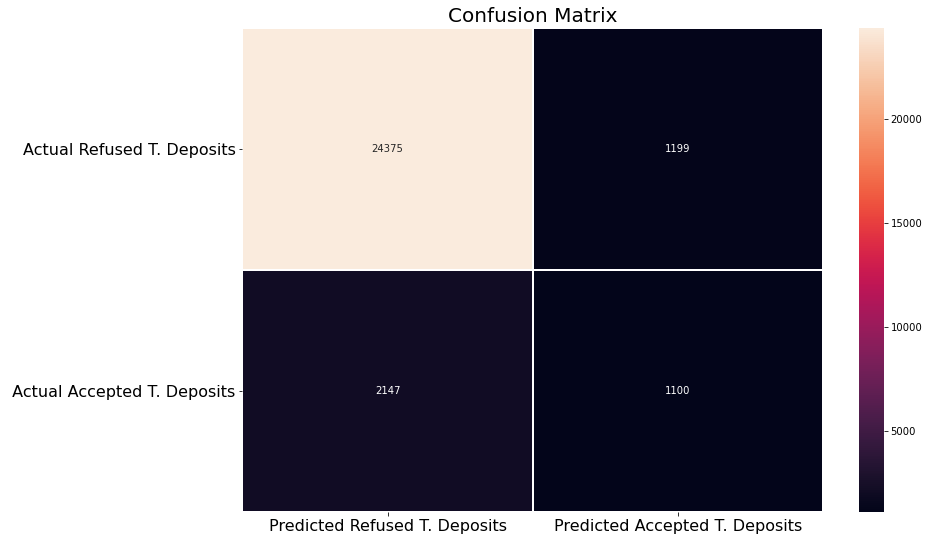

In [134]:
# 25574 : no, 3247 : yes, all : 28821
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Predicted Refused T. Deposits','Predicted Accepted T. Deposits'], fontsize=16, rotation=360)
ax.set_yticklabels(['Actual Refused T. Deposits', ' Actual Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

Dari hasil confussion matrix, kita mendapatkan sebaran jumlah nasabah di setiap matriksnya. Kita akan menghitung jumlah nasabah dari setiap matriks ke dari rasio 100 orang.

In [135]:
TN= round((24375/28821*100),0)
FP= round((1199/28821*100),0)
FN= round((2147/28821*100),0)
TP= round((1100/28821*100),0)

In [136]:
print('Jumlah nasabah dalam matriks TN:', TN,'orang')
print('Jumlah nasabah dalam matriks FP:', FP,'orang')
print('Jumlah nasabah dalam matriks FN:', FN,'orang')
print('Jumlah nasabah dalam matriks TP:', TP,'orang')

Jumlah nasabah dalam matriks TN: 85.0 orang
Jumlah nasabah dalam matriks FP: 4.0 orang
Jumlah nasabah dalam matriks FN: 7.0 orang
Jumlah nasabah dalam matriks TP: 4.0 orang


### After Tuning

In [137]:
best_model_rf=grid_search_rf.best_estimator_
y_train_pred = cross_val_predict(best_model_rf, x_train, y_train, cv=skfold)
best_model_rf.fit(x_train, y_train)
print ("Random Forest Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Random Forest Classifier accuracy is 0.87


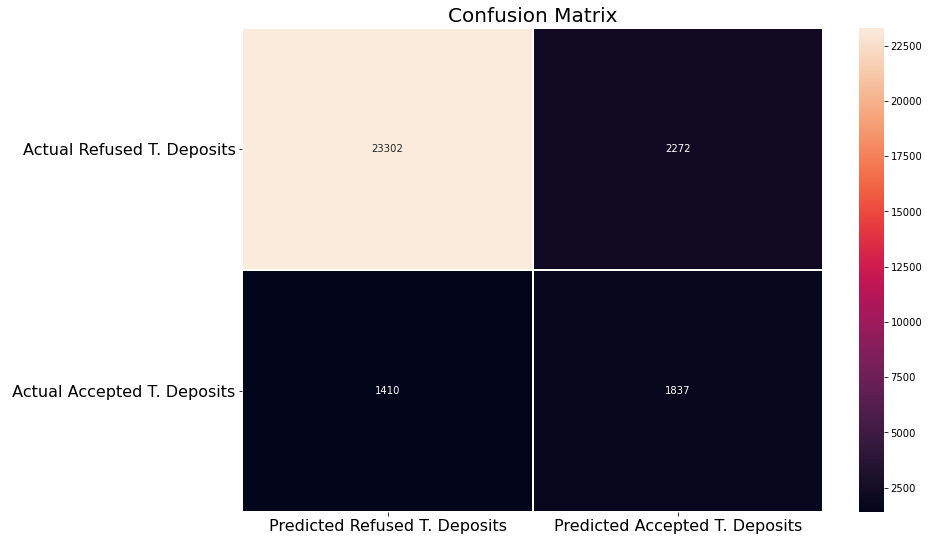

In [138]:
# 25574 : no, 3247 : yes, all : 28821
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Predicted Refused T. Deposits','Predicted Accepted T. Deposits'], fontsize=16, rotation=360)
ax.set_yticklabels(['Actual Refused T. Deposits', ' Actual Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [139]:
TN1= round((23302/28821*100),0)
FP1= round((2272/28821*100),0)
FN1= round((1410/28821*100),0)
TP1= round((1837/28821*100),0)

In [140]:
print('Jumlah nasabah dalam matriks TN:', TN1,'orang')
print('Jumlah nasabah dalam matriks FP:', FP1,'orang')
print('Jumlah nasabah dalam matriks FN:', FN1,'orang')
print('Jumlah nasabah dalam matriks TP:', TP1,'orang')

Jumlah nasabah dalam matriks TN: 81.0 orang
Jumlah nasabah dalam matriks FP: 8.0 orang
Jumlah nasabah dalam matriks FN: 5.0 orang
Jumlah nasabah dalam matriks TP: 6.0 orang


### Cost and Benetfit Analysis

Dari hasil perubahan komposisi jumlah nasabah per 100 orang dalam setiap matrix, kita dapat membuat analisa berdasarkan cost yang dikeluarkan untuk telemarketing campaign, serta benefit income dari hasil konversi telemarketing campaign nasabah yang berlanggan dengan perhitungan sebagai berikut:

* TN turun dari 85 orang menjadi 81 orang dan TP naik dari 4 orang ke 6 orang
* FN turun dari 7 orang ke 5 orang dan FP naik dari 4 orang ke 8 orang  
* Biaya telemarketing :
    * Biaya telepon  0.45EUR (http://www.onesimcard.com/cell-phone-rates/portugal/#rates_table)
    * Rata-rata durasi telepon 258 detik, dibulatkan menjadi 5 menit
    * Rata-rata pengulangan telepon calon nasabah adalah 2 kali
* Income Bank dari deposit berjangka:
    * Angka deposit minimal adalah 250EUR(setara 3,750,000 IDR) per pelanggan (https://www.bbva.pt/en/pessoas/produtos/depositos-a-prazo.html)
    * Asumsi 1x melakukan deposit sebesar 3400EUR (setara 51,000,000IDR)
    * Asumsi bank mendapatkan keuntungan 2% dari transaksi deposito
    
`Before Tuning`
* fix cost (TN)
    * 85 x 0.45 EURx 5 x 2 = **382.5 EUR**
* potensial cost (FP)
    * 4 x 0.45 EURx 5 x 2 = **18 EUR** 
    
    
* fix income (TP)
    * 4 x 3400 EUR x 2% = **272 EUR**
* potensial income (FN)
    * 7 x 3400 EUR x 2% = **476 EUR**


`After Tuning`
* fix cost (TN)
    * 81 x 0.45 EURx 5 x 2 = **364.5 EUR**
* potensial cost (FP)
    * 8 x 0.45 EURx 5 x 2 = **36 EUR**
    
    
* fix income (TP)
    * 6 x 3400 EUR x 2% = **408 EUR**
* potensial income (FN)
    * 5 x 3400 EUR x 2% = **340 EUR**
    
Dari data perbandingan cost dan income before dan after tuning pada model yang kita buat dapat dilihat bahwa:  
* fix cost mengalami penurunan nilai `18 EUR` dan fix income mengalami kenaikan nilai `136 EUR`.    
* dari data per 100 orang, model kita dapat mengurangi fix cost dengan cara mengkonversi data 4 orang yang termasuk pada matrix TN menjadi matrix FP (dari 85 orang menjadi 81 orang)
* dari data per 100 orang, model kita dapat meningkatkan fix income dengan cara mengkonversi data 2 orang yang termasuk pada matrix TP menjadi FN (dari 4 orang menjadi 6 orang)

Maka dari itu model yang kita gunakan sudah bisa meminimalkan nilai cost dan memaksimalkan nilai income karena dari penurunan nilai biaya dan kenaikan nilai income yang didapat pada contoh data per 100 orang.

# ML Explainable/Interpretable

## Feature Importance

In [141]:
# before
rf = RandomForestClassifier()
smote = SMOTE(random_state=2020)
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',rf)])
estimator.fit(x_train, y_train)
y_pred=estimator.predict(x_test)
print('BEFORE')
print(classification_report(y_test,y_pred))
print('f1 score:', f1_score(y_test,y_pred))

BEFORE
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10960
           1       0.49      0.34      0.40      1392

    accuracy                           0.89     12352
   macro avg       0.70      0.65      0.67     12352
weighted avg       0.87      0.89      0.88     12352

f1 score: 0.4038704249053429


In [142]:
feature_onehot=list(estimator[0].transformers_[0][1].get_feature_names_out())
feature_ordinal=estimator[0].transformers_[1][1].get_feature_names()
feature_binary=estimator[0].transformers_[2][1].get_feature_names()
feature_robust=list(estimator[0].transformers_[3][1].get_feature_names_out())
feature_pass=list(x.iloc[:,[12,13,14,15,16]].columns)

In [143]:
features=feature_onehot+feature_ordinal+feature_binary+feature_robust+feature_pass
features

['marital_married',
 'marital_single',
 'default_no',
 'housing_yes',
 'loan_yes',
 'poutcome_nonexistent',
 'poutcome_success',
 'contact_telephone',
 'age',
 'education',
 'month',
 'day_of_week',
 'job_0',
 'job_1',
 'job_2',
 'job_3',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [144]:
pd.DataFrame({'importance':estimator[2].feature_importances_}, index=features)

,importances
marital_married,0.025815
marital_single,0.020223
default_no,0.045531
housing_yes,0.061688
loan_yes,0.038366
poutcome_nonexistent,0.034088
poutcome_success,0.040706
contact_telephone,0.035193
age,0.049933
education,0.060481


<AxesSubplot:>

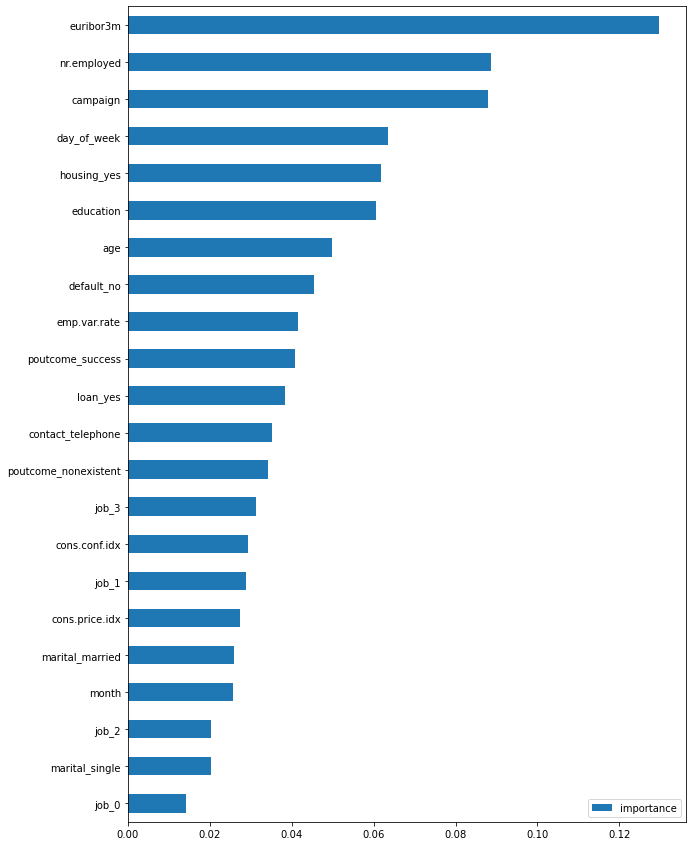

In [145]:
pd.DataFrame({'importance':estimator[2].feature_importances_}, index=features).sort_values('importance').plot(kind='barh', figsize=(10,15))

In [147]:
# after
best_model_rf=grid_search_rf.best_estimator_
best_model_rf.fit(x_train,y_train)
y_pred=best_model_rf.predict(x_test)
print('AFTER')
print(classification_report(y_test,y_pred))
print ('f1 score:', f1_score(y_test,y_pred))

AFTER
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     10960
           1       0.45      0.56      0.50      1392

    accuracy                           0.87     12352
   macro avg       0.70      0.74      0.71     12352
weighted avg       0.89      0.87      0.88     12352

f1 score: 0.4987261146496814


In [150]:
pd.DataFrame({'importance':best_model_rf[2].feature_importances_}, index=features)

,importance
marital_married,0.014781
marital_single,0.010845
default_no,0.061193
housing_yes,0.045253
loan_yes,0.032909
poutcome_nonexistent,0.044300
poutcome_success,0.049614
contact_telephone,0.042467
age,0.043448
education,0.030586


<AxesSubplot:>

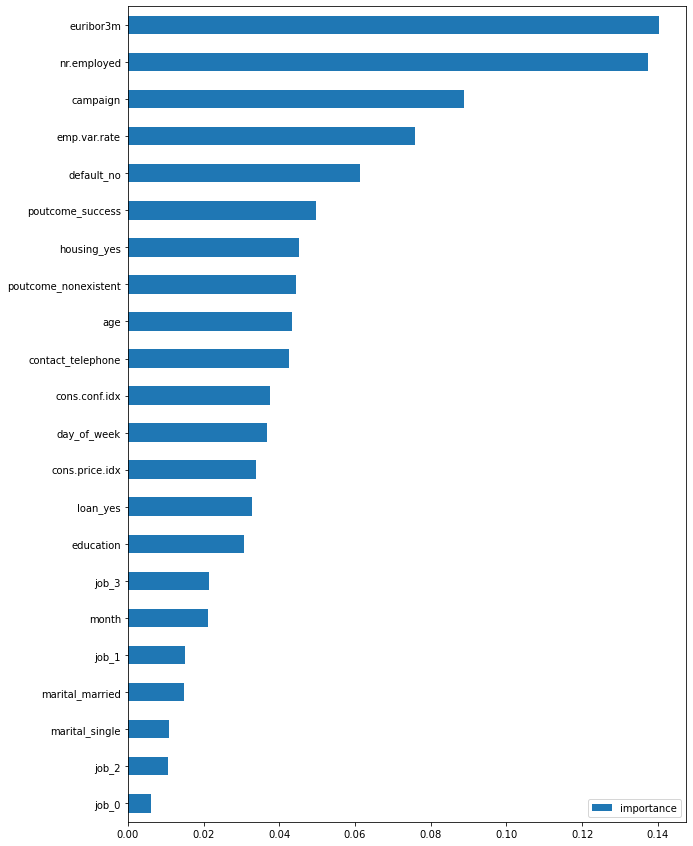

In [151]:
pd.DataFrame({'importance':best_model_rf[2].feature_importances_}, index=features).sort_values('importance').plot(kind='barh', figsize=(10,15))

Dari hasil feature importance, kita dapati fitur-fitur yang sering digunakan sebagai splitter dalam model untuk membedakan antara kelas 0 dan 1. Adapun analisa feature importance sebagi berikut: 
* ``euribor3m`` memiliki nilai importansi yang paling besar dalam membedakan kelas positif menurut model. Namun, berdasarkan hasil analisa fitur terhadap terhadap target didapati pola bahwa nasabah berlangganan deposito pada suku bunga manapun.
* ``nr.employed`` memiliki nilai importansi kedua terbesar dalam membedakan kelas positif menurut model. Hal ini sejalan dengan hasil analisa dimana semakin rendah nilai ``nr.employed`` maka semakin cenderung nasabah berlangganan deposit
* ``campaign`` memiliki nilai importansi ketiga terbesar dalam membedakan kelas positif menurut model. Hal ini sejalan dengan hasil analisa dimana semakin rendah nilai ``campaign`` maka semakin cenderung berlangganan deposit
* ``emp.var.rate`` memiliki nilai importansi keempat terbesar dalam membedakan kelas positif menurut model. Hal ini sejalan dengan hasil analisa dimana semakin rendah nilai ``emp.var.rate`` maka semakin cenderung berlangganan deposit


# Summary and Recommendation

Dari hasil modelling, didapatkan bahwa hasil model setelah di tunning tidak memiliki kenaikan signifikan atau cenderung sama. Dalam hal ini kita melihat bahwa ada kecenderungan kondisi dataset yang kurang baik, sehingga kurang dapat memprediksi nasabah yang akan berlangganan deposito atau tidak. 

Adapula fitur kondisi sosial-ekonomi yang mencerminkan kondisi makroekonomi ketika masa resesi global dan pasca pemulihan resesi global yang mencerminkan kondisi ekonomi yang tidak stabil. Maka dari itu, model akan menjadi kurang akurat untuk memprediksi calon nasabah dalam kondisi ekonomi yang stabil.

Adapula analisa cost and benefit, didapatkan juga bahwa penggunakan Machine Learning menurunkan cost sebesar `18EUR` dan menaikan income sebesar `136 EUR` 

Beberapa rekomendasi yang dapat diberikan adalah:
* Menambah fitur pada dataset yang mencerminkan transaksi nasabah (misal: pendapatan nasabah, saldo tabungan, dsbnya)
* Menambah fitur pada dataset yang mencerminkan historik panggilan telepon (misal: waktu panggilan
* Mencoba algoritma model Machine Learning yang lain, melakukan hyperparameter tunning kembali, serta melakukan imbalance treatment dengan metode lain seperti Randomoversampler dan lain-lain.
* Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.